# Convolutional Neural Networks (CNNs)

This notebook contains examples of using CNNs for classification and regression.

In [185]:
import keras
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from pprint import pprint
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
#keras
from keras import regularizers
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


## Dataset
The dataset used here is desscribed below:
    
```
There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).
```

Information
```
Classes - 40
Samples total - 400
Dimensionality - 4096
Features - real, between 0 and 1
```

In [186]:
import sklearn
oliv_faces = datasets.fetch_olivetti_faces()

In [187]:
"""
First split is 80/20 for BEFORE/test from FULL dataset

The validation set is specified within the MLP:
    The second is 80/20 for train/validate from BEFORE dataset
"""
X_train, X_test, y_train, y_test = train_test_split(np.array(list(oliv_faces.images)), keras.utils.to_categorical(oliv_faces.target), test_size=0.20, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

print(X_train.shape[0])
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_validate = X_validate.reshape(X_validate.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

256


In [188]:
X_train[0].shape

(64, 64, 1)

In [189]:
num_train = len(y_train)
num_validate = len(y_validate)
num_test = len(y_test)
print(f"The number of training samples is: {num_train}")
print(f"The number of validation samples is: {num_validate}")
print(f"The number of testing samples is: {num_test}")

The number of training samples is: 256
The number of validation samples is: 64
The number of testing samples is: 80


# Creating Models

This section creates different types of CNNs

In [ ]:
class CNN:
    
    def __init__(self, number_of_convopools, output_length, regularize=None):
        self.model = Sequential()
        self.img_w = 64
        self.img_h = 64
        self.epochs = None
        self.output_length = output_length
        self.regularize = regularize
        self.number_of_convopools = number_of_convopools
        # make model
        self.make_model(number_of_convopools, regularize=regularize)
        
    def make_model(self, number_of_convopools, regularize=None):
        """
        This method constructs the CNN
        """
        self.model.add(Conv2D(10, kernel_size = 3, 
                              activation = "relu", 
                              input_shape = (self.img_w, self.img_h, 1)))
        self.model.add(MaxPooling2D(pool_size = (4,4)))
        self.model.add(Flatten())
        
        # add fully connected layers
        for count in range(number_of_convopools):
            if regularize == 'l1':
                self.model.add(Dense(100, activation = "relu", kernel_regularizer=regularizers.l1(0.00001)))
            elif regularize == 'dropout':
                self.model.add(Dense(100, activation = "relu"))
                self.model.add(Dropout(0.1))
            else:
                self.model.add(Dense(100, activation = "relu"))
        self.model.add(Dense(self.output_length, activation = "softmax"))
        
    def summary(self):
        """ get model information """
        self.model.summary()

    def train(self, X_train, y_train, X_validate, y_validate, num_epochs=100, batch_size_n=10):
        """
        This method trains the model
        """
        self.epochs = num_epochs
        self.model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
        self.model.fit(X_train, y_train, 
                       epochs = num_epochs, 
                       batch_size = batch_size_n, 
                       validation_data = (X_validate, y_validate))
        
    def score(self, testX, testY) -> list:
        """
        This method is used for testing the model
        """
        loss, acc = self.model.evaluate(testX, testY, verbose =0)
        return loss, acc
    
    def get_full_name(self):
        """
        returns more descriptive name
        """
        name = ""
        name += f"num fully connected layers: {self.number_of_convopools} \n"
        name += f"Regularization: {self.regularize} "
        if self.epochs:
            name += f"Epochs: {self.epochs}"
        return name

In [286]:
# without regularization
model_1 = CNN(number_of_convopools=1, output_length=len(y_train[0]))
model_2 = CNN(number_of_convopools=2, output_length=len(y_train[0]))
model_3 = CNN(number_of_convopools=3, output_length=len(y_train[0]))
# with l1 regularization
model_4 = CNN(number_of_convopools=1, regularize='l1', output_length=len(y_train[0]))
model_5 = CNN(number_of_convopools=2, regularize='l1', output_length=len(y_train[0]))
model_6 = CNN(number_of_convopools=3, regularize='l1', output_length=len(y_train[0]))
# with dropout
model_7 = CNN(number_of_convopools=1, regularize='dropout', output_length=len(y_train[0]))
model_8 = CNN(number_of_convopools=2, regularize='dropout', output_length=len(y_train[0]))
model_9 = CNN(number_of_convopools=3, regularize='dropout', output_length=len(y_train[0]))

In [287]:
MODELS = {"Model 1" : model_1,
          "Model 2" : model_2,
          "Model 3" : model_3,
          "Model 4" : model_4,
          "Model 5" : model_5,
          "Model 6" : model_6,
          "Model 7" : model_7,
          "Model 8" : model_8,
          "Model 9" : model_9
         }

### Training Models

In [294]:
# Train all of the models
for model_name in MODELS.keys():
    print(f"Training {model_name}")
    MODELS[model_name].train(X_train, y_train, X_validate, y_validate, num_epochs=100, batch_size_n=10)

Training Model 1
Train on 256 samples, validate on 64 samples
Epoch 1/100
256/256 [==============================] - 2s 7ms/sample - loss: 0.3948 - acc: 0.9102 - val_loss: 1.0945 - val_acc: 0.7031
Epoch 2/100
256/256 [==============================] - 0s 690us/sample - loss: 0.3178 - acc: 0.9453 - val_loss: 1.0299 - val_acc: 0.7969
Epoch 3/100
256/256 [==============================] - 0s 713us/sample - loss: 0.2974 - acc: 0.9531 - val_loss: 0.9981 - val_acc: 0.7969
Epoch 4/100
256/256 [==============================] - 0s 741us/sample - loss: 0.3109 - acc: 0.9375 - val_loss: 1.0377 - val_acc: 0.7500
Epoch 5/100
256/256 [==============================] - 0s 709us/sample - loss: 0.2848 - acc: 0.9570 - val_loss: 0.9816 - val_acc: 0.7812
Epoch 6/100
256/256 [==============================] - 0s 710us/sample - loss: 0.2754 - acc: 0.9531 - val_loss: 0.9359 - val_acc: 0.7500
Epoch 7/100
256/256 [==============================] - 0s 755us/sample - loss: 0.2754 - acc: 0.9492 - val_loss: 0.8284

Epoch 60/100
256/256 [==============================] - 0s 686us/sample - loss: 0.0218 - acc: 1.0000 - val_loss: 0.7891 - val_acc: 0.8125
Epoch 61/100
256/256 [==============================] - 0s 702us/sample - loss: 0.0194 - acc: 1.0000 - val_loss: 0.8176 - val_acc: 0.7969
Epoch 62/100
256/256 [==============================] - 0s 700us/sample - loss: 0.0170 - acc: 1.0000 - val_loss: 0.8499 - val_acc: 0.7969
Epoch 63/100
256/256 [==============================] - 0s 688us/sample - loss: 0.0155 - acc: 1.0000 - val_loss: 0.8422 - val_acc: 0.8125
Epoch 64/100
256/256 [==============================] - 0s 705us/sample - loss: 0.0161 - acc: 1.0000 - val_loss: 0.7592 - val_acc: 0.7969
Epoch 65/100
256/256 [==============================] - 0s 697us/sample - loss: 0.0157 - acc: 1.0000 - val_loss: 0.7582 - val_acc: 0.8125
Epoch 66/100
256/256 [==============================] - 0s 700us/sample - loss: 0.0148 - acc: 1.0000 - val_loss: 0.8588 - val_acc: 0.8125
Epoch 67/100
256/256 [============

256/256 [==============================] - 0s 730us/sample - loss: 0.0050 - acc: 1.0000 - val_loss: 0.6001 - val_acc: 0.8906
Epoch 20/100
256/256 [==============================] - 0s 778us/sample - loss: 0.0044 - acc: 1.0000 - val_loss: 0.6501 - val_acc: 0.8594
Epoch 21/100
256/256 [==============================] - 0s 702us/sample - loss: 0.0037 - acc: 1.0000 - val_loss: 0.5944 - val_acc: 0.8281
Epoch 22/100
256/256 [==============================] - 0s 721us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 0.6354 - val_acc: 0.8438
Epoch 23/100
256/256 [==============================] - 0s 728us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 0.6008 - val_acc: 0.8750
Epoch 24/100
256/256 [==============================] - 0s 757us/sample - loss: 0.0032 - acc: 1.0000 - val_loss: 0.5886 - val_acc: 0.8438
Epoch 25/100
256/256 [==============================] - 0s 724us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 0.5811 - val_acc: 0.8438
Epoch 26/100
256/256 [=========================

256/256 [==============================] - 0s 735us/sample - loss: 3.2840e-04 - acc: 1.0000 - val_loss: 0.6405 - val_acc: 0.8906
Epoch 78/100
256/256 [==============================] - 0s 767us/sample - loss: 3.2310e-04 - acc: 1.0000 - val_loss: 0.6421 - val_acc: 0.8750
Epoch 79/100
256/256 [==============================] - 0s 788us/sample - loss: 3.2136e-04 - acc: 1.0000 - val_loss: 0.6521 - val_acc: 0.8906
Epoch 80/100
256/256 [==============================] - 0s 731us/sample - loss: 3.0977e-04 - acc: 1.0000 - val_loss: 0.6454 - val_acc: 0.8906
Epoch 81/100
256/256 [==============================] - 0s 719us/sample - loss: 2.9952e-04 - acc: 1.0000 - val_loss: 0.6550 - val_acc: 0.8906
Epoch 82/100
256/256 [==============================] - 0s 720us/sample - loss: 2.8526e-04 - acc: 1.0000 - val_loss: 0.6314 - val_acc: 0.8906
Epoch 83/100
256/256 [==============================] - 0s 727us/sample - loss: 2.7551e-04 - acc: 1.0000 - val_loss: 0.6664 - val_acc: 0.8906
Epoch 84/100
256/25

256/256 [==============================] - 0s 774us/sample - loss: 0.4426 - acc: 0.8477 - val_loss: 0.9801 - val_acc: 0.7188
Epoch 36/100
256/256 [==============================] - 0s 728us/sample - loss: 0.4698 - acc: 0.8516 - val_loss: 0.9746 - val_acc: 0.7500
Epoch 37/100
256/256 [==============================] - 0s 732us/sample - loss: 0.5089 - acc: 0.8516 - val_loss: 1.4269 - val_acc: 0.6094
Epoch 38/100
256/256 [==============================] - 0s 732us/sample - loss: 0.1236 - acc: 0.9648 - val_loss: 1.1251 - val_acc: 0.7656
Epoch 39/100
256/256 [==============================] - 0s 748us/sample - loss: 0.0500 - acc: 0.9961 - val_loss: 0.9788 - val_acc: 0.8281
Epoch 40/100
256/256 [==============================] - 0s 746us/sample - loss: 0.0263 - acc: 1.0000 - val_loss: 0.8194 - val_acc: 0.8438
Epoch 41/100
256/256 [==============================] - 0s 744us/sample - loss: 0.0163 - acc: 1.0000 - val_loss: 0.9252 - val_acc: 0.8281
Epoch 42/100
256/256 [=========================

256/256 [==============================] - 0s 727us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 1.1410 - val_acc: 0.8125
Epoch 95/100
256/256 [==============================] - 0s 718us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 1.1330 - val_acc: 0.8125
Epoch 96/100
256/256 [==============================] - 0s 730us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 1.1333 - val_acc: 0.8125
Epoch 97/100
256/256 [==============================] - 0s 726us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 1.1547 - val_acc: 0.8125
Epoch 98/100
256/256 [==============================] - 0s 731us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 1.1235 - val_acc: 0.8125
Epoch 99/100
256/256 [==============================] - 0s 726us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 1.1645 - val_acc: 0.7969
Epoch 100/100
256/256 [==============================] - 0s 713us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 1.1526 - val_acc: 0.8125
Training Model 4
Train on 256 samples, validat

256/256 [==============================] - 0s 936us/sample - loss: 0.0333 - acc: 1.0000 - val_loss: 0.4278 - val_acc: 0.9375
Epoch 54/100
256/256 [==============================] - 0s 743us/sample - loss: 0.0329 - acc: 1.0000 - val_loss: 0.3919 - val_acc: 0.9219
Epoch 55/100
256/256 [==============================] - 0s 784us/sample - loss: 0.0331 - acc: 1.0000 - val_loss: 0.4336 - val_acc: 0.9219
Epoch 56/100
256/256 [==============================] - 0s 742us/sample - loss: 0.0327 - acc: 1.0000 - val_loss: 0.4458 - val_acc: 0.9219
Epoch 57/100
256/256 [==============================] - 0s 730us/sample - loss: 0.0327 - acc: 1.0000 - val_loss: 0.3817 - val_acc: 0.9375
Epoch 58/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0322 - acc: 1.0000 - val_loss: 0.4402 - val_acc: 0.9219
Epoch 59/100
256/256 [==============================] - 0s 780us/sample - loss: 0.0319 - acc: 1.0000 - val_loss: 0.3929 - val_acc: 0.9219
Epoch 60/100
256/256 [===========================

256/256 [==============================] - 0s 731us/sample - loss: 0.2377 - acc: 0.9336 - val_loss: 1.2786 - val_acc: 0.7031
Epoch 13/100
256/256 [==============================] - 0s 826us/sample - loss: 0.2608 - acc: 0.9258 - val_loss: 0.6007 - val_acc: 0.8594
Epoch 14/100
256/256 [==============================] - 0s 762us/sample - loss: 0.1167 - acc: 0.9883 - val_loss: 0.5314 - val_acc: 0.7969
Epoch 15/100
256/256 [==============================] - 0s 714us/sample - loss: 0.1020 - acc: 0.9844 - val_loss: 0.5971 - val_acc: 0.8125
Epoch 16/100
256/256 [==============================] - 0s 745us/sample - loss: 0.0664 - acc: 0.9961 - val_loss: 0.4445 - val_acc: 0.8594
Epoch 17/100
256/256 [==============================] - 0s 743us/sample - loss: 0.0499 - acc: 1.0000 - val_loss: 0.5432 - val_acc: 0.8594
Epoch 18/100
256/256 [==============================] - 0s 808us/sample - loss: 0.0415 - acc: 1.0000 - val_loss: 0.3905 - val_acc: 0.9062
Epoch 19/100
256/256 [=========================

256/256 [==============================] - 0s 789us/sample - loss: 0.0285 - acc: 1.0000 - val_loss: 0.3900 - val_acc: 0.8906
Epoch 72/100
256/256 [==============================] - 0s 728us/sample - loss: 0.0284 - acc: 1.0000 - val_loss: 0.3924 - val_acc: 0.8750
Epoch 73/100
256/256 [==============================] - 0s 705us/sample - loss: 0.0283 - acc: 1.0000 - val_loss: 0.3609 - val_acc: 0.8906
Epoch 74/100
256/256 [==============================] - 0s 730us/sample - loss: 0.0282 - acc: 1.0000 - val_loss: 0.3801 - val_acc: 0.8906
Epoch 75/100
256/256 [==============================] - 0s 735us/sample - loss: 0.0281 - acc: 1.0000 - val_loss: 0.3709 - val_acc: 0.8906
Epoch 76/100
256/256 [==============================] - 0s 884us/sample - loss: 0.0280 - acc: 1.0000 - val_loss: 0.3946 - val_acc: 0.8750
Epoch 77/100
256/256 [==============================] - 0s 739us/sample - loss: 0.0279 - acc: 1.0000 - val_loss: 0.3964 - val_acc: 0.8906
Epoch 78/100
256/256 [=========================

256/256 [==============================] - 0s 724us/sample - loss: 0.0366 - acc: 1.0000 - val_loss: 0.8536 - val_acc: 0.8125
Epoch 31/100
256/256 [==============================] - 0s 705us/sample - loss: 0.0363 - acc: 1.0000 - val_loss: 0.8851 - val_acc: 0.8125
Epoch 32/100
256/256 [==============================] - 0s 827us/sample - loss: 0.0361 - acc: 1.0000 - val_loss: 0.9062 - val_acc: 0.7656
Epoch 33/100
256/256 [==============================] - 0s 718us/sample - loss: 0.0358 - acc: 1.0000 - val_loss: 0.8564 - val_acc: 0.7969
Epoch 34/100
256/256 [==============================] - 0s 719us/sample - loss: 0.0356 - acc: 1.0000 - val_loss: 0.8198 - val_acc: 0.8281
Epoch 35/100
256/256 [==============================] - 0s 719us/sample - loss: 0.0352 - acc: 1.0000 - val_loss: 0.8449 - val_acc: 0.8438
Epoch 36/100
256/256 [==============================] - 0s 726us/sample - loss: 0.0350 - acc: 1.0000 - val_loss: 0.8231 - val_acc: 0.7969
Epoch 37/100
256/256 [=========================

256/256 [==============================] - 0s 809us/sample - loss: 0.0318 - acc: 1.0000 - val_loss: 0.8593 - val_acc: 0.8125
Epoch 90/100
256/256 [==============================] - 0s 798us/sample - loss: 0.0317 - acc: 1.0000 - val_loss: 0.8588 - val_acc: 0.8281
Epoch 91/100
256/256 [==============================] - 0s 2ms/sample - loss: 0.0316 - acc: 1.0000 - val_loss: 0.8572 - val_acc: 0.8125
Epoch 92/100
256/256 [==============================] - 0s 872us/sample - loss: 0.0315 - acc: 1.0000 - val_loss: 0.8633 - val_acc: 0.8125
Epoch 93/100
256/256 [==============================] - 0s 826us/sample - loss: 0.0314 - acc: 1.0000 - val_loss: 0.8568 - val_acc: 0.8125
Epoch 94/100
256/256 [==============================] - 0s 800us/sample - loss: 0.0313 - acc: 1.0000 - val_loss: 0.8632 - val_acc: 0.8125
Epoch 95/100
256/256 [==============================] - 0s 799us/sample - loss: 0.0312 - acc: 1.0000 - val_loss: 0.8554 - val_acc: 0.8125
Epoch 96/100
256/256 [===========================

256/256 [==============================] - 0s 704us/sample - loss: 0.2124 - acc: 0.9375 - val_loss: 0.6667 - val_acc: 0.8281
Epoch 49/100
256/256 [==============================] - 0s 697us/sample - loss: 0.1715 - acc: 0.9688 - val_loss: 0.5783 - val_acc: 0.8438
Epoch 50/100
256/256 [==============================] - 0s 693us/sample - loss: 0.2943 - acc: 0.8945 - val_loss: 0.6495 - val_acc: 0.8125
Epoch 51/100
256/256 [==============================] - 0s 711us/sample - loss: 0.2031 - acc: 0.9453 - val_loss: 0.5450 - val_acc: 0.8594
Epoch 52/100
256/256 [==============================] - 0s 707us/sample - loss: 0.2332 - acc: 0.9102 - val_loss: 0.4639 - val_acc: 0.8594
Epoch 53/100
256/256 [==============================] - 0s 767us/sample - loss: 0.2660 - acc: 0.9219 - val_loss: 0.5856 - val_acc: 0.8438
Epoch 54/100
256/256 [==============================] - 0s 765us/sample - loss: 0.1868 - acc: 0.9453 - val_loss: 0.5791 - val_acc: 0.8750
Epoch 55/100
256/256 [=========================

256/256 [==============================] - 0s 708us/sample - loss: 0.6196 - acc: 0.8125 - val_loss: 0.6582 - val_acc: 0.8281
Epoch 8/100
256/256 [==============================] - 0s 706us/sample - loss: 0.6595 - acc: 0.8125 - val_loss: 0.6515 - val_acc: 0.7812
Epoch 9/100
256/256 [==============================] - 0s 713us/sample - loss: 0.6092 - acc: 0.8281 - val_loss: 0.5838 - val_acc: 0.8281
Epoch 10/100
256/256 [==============================] - 0s 716us/sample - loss: 0.6031 - acc: 0.8125 - val_loss: 0.6327 - val_acc: 0.8281
Epoch 11/100
256/256 [==============================] - 0s 712us/sample - loss: 0.5773 - acc: 0.8320 - val_loss: 0.5826 - val_acc: 0.8438
Epoch 12/100
256/256 [==============================] - 0s 717us/sample - loss: 0.6417 - acc: 0.8047 - val_loss: 0.6021 - val_acc: 0.8594
Epoch 13/100
256/256 [==============================] - 0s 721us/sample - loss: 0.6374 - acc: 0.8008 - val_loss: 0.5827 - val_acc: 0.7812
Epoch 14/100
256/256 [===========================

256/256 [==============================] - 0s 764us/sample - loss: 0.3161 - acc: 0.8945 - val_loss: 0.5333 - val_acc: 0.8906
Epoch 67/100
256/256 [==============================] - 0s 776us/sample - loss: 0.3087 - acc: 0.9102 - val_loss: 0.4789 - val_acc: 0.8125
Epoch 68/100
256/256 [==============================] - 0s 778us/sample - loss: 0.3485 - acc: 0.8984 - val_loss: 0.7690 - val_acc: 0.7969
Epoch 69/100
256/256 [==============================] - 0s 787us/sample - loss: 0.3689 - acc: 0.8984 - val_loss: 0.5568 - val_acc: 0.8125
Epoch 70/100
256/256 [==============================] - 0s 785us/sample - loss: 0.3148 - acc: 0.9102 - val_loss: 0.5899 - val_acc: 0.8906
Epoch 71/100
256/256 [==============================] - 0s 783us/sample - loss: 0.2520 - acc: 0.9336 - val_loss: 0.5393 - val_acc: 0.8594
Epoch 72/100
256/256 [==============================] - 0s 764us/sample - loss: 0.2571 - acc: 0.9219 - val_loss: 0.5678 - val_acc: 0.8438
Epoch 73/100
256/256 [=========================

256/256 [==============================] - 0s 788us/sample - loss: 0.0690 - acc: 0.9844 - val_loss: 0.6179 - val_acc: 0.8750
Epoch 26/100
256/256 [==============================] - 0s 738us/sample - loss: 0.1042 - acc: 0.9648 - val_loss: 0.7899 - val_acc: 0.8594
Epoch 27/100
256/256 [==============================] - 0s 786us/sample - loss: 0.0995 - acc: 0.9805 - val_loss: 0.7582 - val_acc: 0.8594
Epoch 28/100
256/256 [==============================] - 0s 767us/sample - loss: 0.0756 - acc: 0.9766 - val_loss: 0.7342 - val_acc: 0.8438
Epoch 29/100
256/256 [==============================] - 0s 803us/sample - loss: 0.0666 - acc: 0.9844 - val_loss: 0.6312 - val_acc: 0.8906
Epoch 30/100
256/256 [==============================] - 0s 790us/sample - loss: 0.0882 - acc: 0.9531 - val_loss: 0.6314 - val_acc: 0.8750
Epoch 31/100
256/256 [==============================] - 0s 734us/sample - loss: 0.0865 - acc: 0.9688 - val_loss: 0.7456 - val_acc: 0.8438
Epoch 32/100
256/256 [=========================

256/256 [==============================] - 0s 908us/sample - loss: 0.0812 - acc: 0.9688 - val_loss: 0.7768 - val_acc: 0.9219
Epoch 85/100
256/256 [==============================] - 0s 860us/sample - loss: 0.0309 - acc: 0.9922 - val_loss: 0.8346 - val_acc: 0.8750
Epoch 86/100
256/256 [==============================] - 0s 894us/sample - loss: 0.0458 - acc: 0.9883 - val_loss: 0.7457 - val_acc: 0.9062
Epoch 87/100
256/256 [==============================] - 0s 960us/sample - loss: 0.0541 - acc: 0.9844 - val_loss: 0.5797 - val_acc: 0.8906
Epoch 88/100
256/256 [==============================] - 0s 874us/sample - loss: 0.0180 - acc: 1.0000 - val_loss: 0.5869 - val_acc: 0.9219
Epoch 89/100
256/256 [==============================] - 0s 864us/sample - loss: 0.0355 - acc: 0.9922 - val_loss: 0.5872 - val_acc: 0.9219
Epoch 90/100
256/256 [==============================] - 0s 880us/sample - loss: 0.0334 - acc: 0.9961 - val_loss: 0.6173 - val_acc: 0.9219
Epoch 91/100
256/256 [=========================

### Testing Models

In [ ]:
def plot_learning(model, test_amount=None):
    """
    given a model, plots the learning curves
    """
    accuracy = model.model.history.history["acc"]
    val_accuracy = model.model.history.history["val_acc"]
    loss = model.model.history.history["loss"]
    val_loss = model.model.history.history["val_loss"]
    
    # make plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.plot(loss, color ="blue", label = "Train Data")
    ax1.plot(val_loss, color ="green", label = "Validation Data")
    
    ax1.set_ylabel("Loss")
    ax1.set_xlabel("Number of epochs")
    ax1.legend()
    
    ax2.plot(accuracy, color ="blue", label = "Train Data")
    ax2.plot(val_accuracy, color ="green", label = "Validation Data")
    
    if test_amount:
        fig.suptitle(model.get_full_name() + f" | test percentage: {test_amount} \n", y=2)
    else:
        fig.suptitle(model.get_full_name())
    ax2.set_ylabel("Accuracy")
    ax2.set_xlabel("Number of epochs")
    ax2.legend()
    plt.show()
    
# learning curves
for model_name, model in MODELS.items():
    plot_learning(model)

In [308]:
TOP_MODEL =  model_5
loss, acc = TOP_MODEL.score(X_test, y_test)
print(f"Top Model Accuracy is: {acc}")

Top Model Accuracy is: 0.9375


# Testing Less Data

In [309]:
train_paritions = {}
for train_percentage in [0.5, 0.75, 1]:
    train_paritions[str(train_percentage * 100)+"%"] = (X_train[:int(len(X_train)*train_percentage)], 
                                                        y_train[0:int(len(y_train)*train_percentage)],
                                                        X_validate[:int(len(X_validate)*train_percentage)],
                                                        y_validate[:int(len(y_validate)*train_percentage)])

Train on 128 samples, validate on 32 samples
Epoch 1/100
128/128 [==============================] - 2s 18ms/sample - loss: 1.4708e-04 - acc: 1.0000 - val_loss: 0.6432 - val_acc: 0.9062
Epoch 2/100
128/128 [==============================] - 0s 790us/sample - loss: 4.3485e-04 - acc: 1.0000 - val_loss: 0.8846 - val_acc: 0.8125
Epoch 3/100
128/128 [==============================] - 0s 783us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 1.2434 - val_acc: 0.7812
Epoch 4/100
128/128 [==============================] - 0s 793us/sample - loss: 0.0032 - acc: 1.0000 - val_loss: 1.4518 - val_acc: 0.7812
Epoch 5/100
128/128 [==============================] - 0s 787us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 2.1699 - val_acc: 0.6562
Epoch 6/100
128/128 [==============================] - 0s 812us/sample - loss: 0.0532 - acc: 0.9922 - val_loss: 1.8363 - val_acc: 0.7188
Epoch 7/100
128/128 [==============================] - 0s 809us/sample - loss: 0.0145 - acc: 0.9922 - val_loss: 1.1474 - val_a

128/128 [==============================] - 0s 812us/sample - loss: 2.6601e-05 - acc: 1.0000 - val_loss: 0.8173 - val_acc: 0.8438
Epoch 59/100
128/128 [==============================] - 0s 795us/sample - loss: 2.6383e-05 - acc: 1.0000 - val_loss: 0.8170 - val_acc: 0.8438
Epoch 60/100
128/128 [==============================] - 0s 789us/sample - loss: 2.6145e-05 - acc: 1.0000 - val_loss: 0.8185 - val_acc: 0.8438
Epoch 61/100
128/128 [==============================] - 0s 757us/sample - loss: 2.5922e-05 - acc: 1.0000 - val_loss: 0.8203 - val_acc: 0.8438
Epoch 62/100
128/128 [==============================] - 0s 780us/sample - loss: 2.5733e-05 - acc: 1.0000 - val_loss: 0.8206 - val_acc: 0.8438
Epoch 63/100
128/128 [==============================] - 0s 778us/sample - loss: 2.5543e-05 - acc: 1.0000 - val_loss: 0.8194 - val_acc: 0.8438
Epoch 64/100
128/128 [==============================] - 0s 763us/sample - loss: 2.5277e-05 - acc: 1.0000 - val_loss: 0.8206 - val_acc: 0.8438
Epoch 65/100
128/12

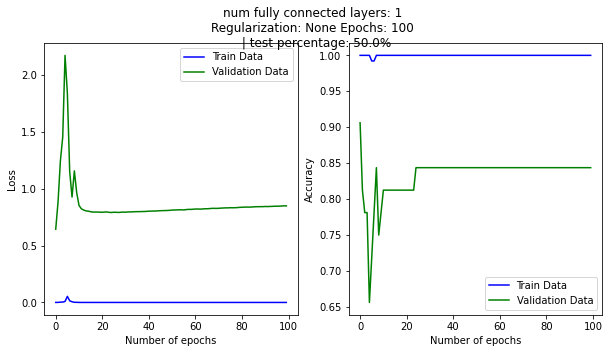

Train on 192 samples, validate on 48 samples
Epoch 1/100
192/192 [==============================] - 3s 13ms/sample - loss: 0.0647 - acc: 0.9844 - val_loss: 0.8374 - val_acc: 0.7500
Epoch 2/100
192/192 [==============================] - 0s 758us/sample - loss: 0.0289 - acc: 0.9844 - val_loss: 0.7871 - val_acc: 0.8750
Epoch 3/100
192/192 [==============================] - 0s 743us/sample - loss: 0.0190 - acc: 0.9948 - val_loss: 1.1525 - val_acc: 0.7917
Epoch 4/100
192/192 [==============================] - 0s 746us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 1.1892 - val_acc: 0.8125
Epoch 5/100
192/192 [==============================] - 0s 743us/sample - loss: 3.0744e-04 - acc: 1.0000 - val_loss: 1.0908 - val_acc: 0.9167
Epoch 6/100
192/192 [==============================] - 0s 740us/sample - loss: 2.2059e-04 - acc: 1.0000 - val_loss: 1.0699 - val_acc: 0.9167
Epoch 7/100
192/192 [==============================] - 0s 733us/sample - loss: 1.7392e-04 - acc: 1.0000 - val_loss: 1.0603 - v

192/192 [==============================] - 0s 775us/sample - loss: 5.2663e-05 - acc: 1.0000 - val_loss: 0.9983 - val_acc: 0.8542
Epoch 59/100
192/192 [==============================] - 0s 766us/sample - loss: 5.2193e-05 - acc: 1.0000 - val_loss: 0.9998 - val_acc: 0.8542
Epoch 60/100
192/192 [==============================] - 0s 765us/sample - loss: 5.1712e-05 - acc: 1.0000 - val_loss: 0.9996 - val_acc: 0.8542
Epoch 61/100
192/192 [==============================] - 0s 764us/sample - loss: 5.1450e-05 - acc: 1.0000 - val_loss: 1.0020 - val_acc: 0.8542
Epoch 62/100
192/192 [==============================] - 0s 762us/sample - loss: 5.1258e-05 - acc: 1.0000 - val_loss: 1.0011 - val_acc: 0.8542
Epoch 63/100
192/192 [==============================] - 0s 773us/sample - loss: 5.1221e-05 - acc: 1.0000 - val_loss: 1.0050 - val_acc: 0.8542
Epoch 64/100
192/192 [==============================] - 0s 763us/sample - loss: 5.0697e-05 - acc: 1.0000 - val_loss: 1.0057 - val_acc: 0.8542
Epoch 65/100
192/19

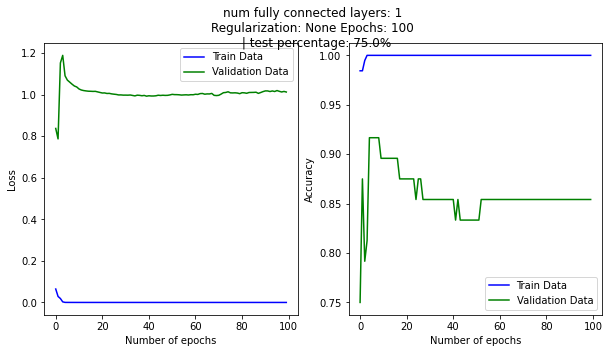

Train on 256 samples, validate on 64 samples
Epoch 1/100
256/256 [==============================] - 2s 9ms/sample - loss: 0.0258 - acc: 0.9922 - val_loss: 1.1296 - val_acc: 0.8125
Epoch 2/100
256/256 [==============================] - 0s 763us/sample - loss: 0.0078 - acc: 1.0000 - val_loss: 0.9873 - val_acc: 0.8438
Epoch 3/100
256/256 [==============================] - 0s 749us/sample - loss: 0.0070 - acc: 0.9961 - val_loss: 1.7150 - val_acc: 0.7344
Epoch 4/100
256/256 [==============================] - 0s 855us/sample - loss: 0.0124 - acc: 1.0000 - val_loss: 1.2899 - val_acc: 0.8281
Epoch 5/100
256/256 [==============================] - 0s 739us/sample - loss: 0.0052 - acc: 1.0000 - val_loss: 1.1956 - val_acc: 0.8438
Epoch 6/100
256/256 [==============================] - 0s 737us/sample - loss: 0.0037 - acc: 1.0000 - val_loss: 1.0066 - val_acc: 0.8594
Epoch 7/100
256/256 [==============================] - 0s 731us/sample - loss: 5.9895e-04 - acc: 1.0000 - val_loss: 0.9726 - val_acc: 0

256/256 [==============================] - 0s 723us/sample - loss: 4.4863e-05 - acc: 1.0000 - val_loss: 1.0144 - val_acc: 0.8281
Epoch 59/100
256/256 [==============================] - 0s 724us/sample - loss: 4.4729e-05 - acc: 1.0000 - val_loss: 1.0186 - val_acc: 0.8281
Epoch 60/100
256/256 [==============================] - 0s 731us/sample - loss: 4.4662e-05 - acc: 1.0000 - val_loss: 1.0099 - val_acc: 0.8281
Epoch 61/100
256/256 [==============================] - 0s 738us/sample - loss: 4.4061e-05 - acc: 1.0000 - val_loss: 1.0157 - val_acc: 0.8281
Epoch 62/100
256/256 [==============================] - 0s 744us/sample - loss: 4.4436e-05 - acc: 1.0000 - val_loss: 1.0084 - val_acc: 0.8281
Epoch 63/100
256/256 [==============================] - 0s 757us/sample - loss: 4.3883e-05 - acc: 1.0000 - val_loss: 1.0120 - val_acc: 0.8281
Epoch 64/100
256/256 [==============================] - 0s 748us/sample - loss: 4.3902e-05 - acc: 1.0000 - val_loss: 1.0168 - val_acc: 0.8281
Epoch 65/100
256/25

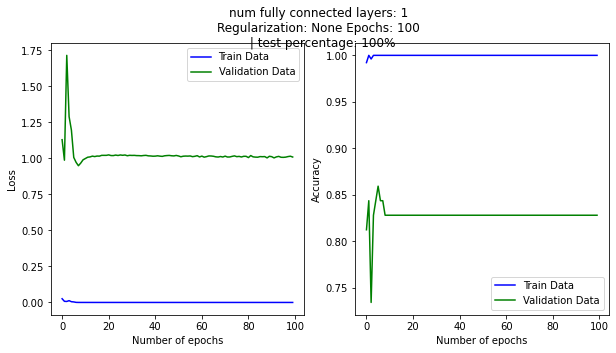

Train on 128 samples, validate on 32 samples
Epoch 1/100
128/128 [==============================] - 2s 19ms/sample - loss: 0.0033 - acc: 1.0000 - val_loss: 0.4911 - val_acc: 0.9062
Epoch 2/100
128/128 [==============================] - 0s 818us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 0.5954 - val_acc: 0.8125
Epoch 3/100
128/128 [==============================] - 0s 803us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.6027 - val_acc: 0.8125
Epoch 4/100
128/128 [==============================] - 0s 790us/sample - loss: 1.4364e-04 - acc: 1.0000 - val_loss: 0.6421 - val_acc: 0.8125
Epoch 5/100
128/128 [==============================] - 0s 802us/sample - loss: 2.1464e-04 - acc: 1.0000 - val_loss: 0.5746 - val_acc: 0.8125
Epoch 6/100
128/128 [==============================] - 0s 806us/sample - loss: 4.4750e-05 - acc: 1.0000 - val_loss: 0.4721 - val_acc: 0.9062
Epoch 7/100
128/128 [==============================] - 0s 821us/sample - loss: 2.8287e-05 - acc: 1.0000 - val_loss: 0.4718

128/128 [==============================] - 0s 761us/sample - loss: 6.1206e-06 - acc: 1.0000 - val_loss: 0.5572 - val_acc: 0.8438
Epoch 59/100
128/128 [==============================] - 0s 786us/sample - loss: 6.0144e-06 - acc: 1.0000 - val_loss: 0.5580 - val_acc: 0.8438
Epoch 60/100
128/128 [==============================] - 0s 794us/sample - loss: 5.9241e-06 - acc: 1.0000 - val_loss: 0.5597 - val_acc: 0.8438
Epoch 61/100
128/128 [==============================] - 0s 784us/sample - loss: 5.8356e-06 - acc: 1.0000 - val_loss: 0.5619 - val_acc: 0.8438
Epoch 62/100
128/128 [==============================] - 0s 818us/sample - loss: 5.7509e-06 - acc: 1.0000 - val_loss: 0.5632 - val_acc: 0.8438
Epoch 63/100
128/128 [==============================] - 0s 789us/sample - loss: 5.6391e-06 - acc: 1.0000 - val_loss: 0.5655 - val_acc: 0.8438
Epoch 64/100
128/128 [==============================] - 0s 776us/sample - loss: 5.5357e-06 - acc: 1.0000 - val_loss: 0.5630 - val_acc: 0.8438
Epoch 65/100
128/12

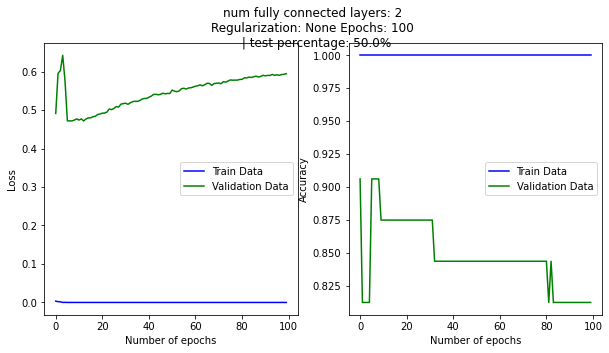

Train on 192 samples, validate on 48 samples
Epoch 1/100
192/192 [==============================] - 2s 13ms/sample - loss: 0.0466 - acc: 0.9844 - val_loss: 1.1797 - val_acc: 0.8542
Epoch 2/100
192/192 [==============================] - 0s 787us/sample - loss: 0.0112 - acc: 1.0000 - val_loss: 0.8980 - val_acc: 0.8750
Epoch 3/100
192/192 [==============================] - 0s 783us/sample - loss: 9.9525e-04 - acc: 1.0000 - val_loss: 1.0854 - val_acc: 0.8542
Epoch 4/100
192/192 [==============================] - 0s 783us/sample - loss: 4.2617e-04 - acc: 1.0000 - val_loss: 1.0933 - val_acc: 0.8542
Epoch 5/100
192/192 [==============================] - 0s 788us/sample - loss: 1.6780e-04 - acc: 1.0000 - val_loss: 1.0558 - val_acc: 0.8750
Epoch 6/100
192/192 [==============================] - 0s 778us/sample - loss: 1.1019e-04 - acc: 1.0000 - val_loss: 1.0436 - val_acc: 0.8542
Epoch 7/100
192/192 [==============================] - 0s 768us/sample - loss: 8.7850e-05 - acc: 1.0000 - val_loss: 1.

192/192 [==============================] - 0s 813us/sample - loss: 1.5954e-05 - acc: 1.0000 - val_loss: 1.0390 - val_acc: 0.8333
Epoch 59/100
192/192 [==============================] - 0s 815us/sample - loss: 1.5760e-05 - acc: 1.0000 - val_loss: 1.0313 - val_acc: 0.8542
Epoch 60/100
192/192 [==============================] - 0s 974us/sample - loss: 1.5469e-05 - acc: 1.0000 - val_loss: 1.0315 - val_acc: 0.8333
Epoch 61/100
192/192 [==============================] - 0s 831us/sample - loss: 1.5145e-05 - acc: 1.0000 - val_loss: 1.0368 - val_acc: 0.8333
Epoch 62/100
192/192 [==============================] - 0s 823us/sample - loss: 1.4909e-05 - acc: 1.0000 - val_loss: 1.0362 - val_acc: 0.8333
Epoch 63/100
192/192 [==============================] - 0s 822us/sample - loss: 1.4675e-05 - acc: 1.0000 - val_loss: 1.0375 - val_acc: 0.8750
Epoch 64/100
192/192 [==============================] - 0s 835us/sample - loss: 1.4462e-05 - acc: 1.0000 - val_loss: 1.0404 - val_acc: 0.8542
Epoch 65/100
192/19

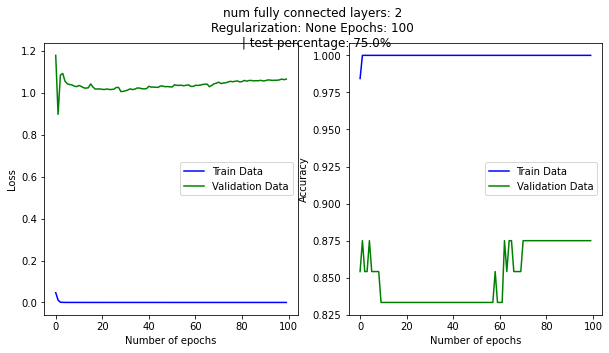

Train on 256 samples, validate on 64 samples
Epoch 1/100
256/256 [==============================] - 2s 10ms/sample - loss: 0.0067 - acc: 0.9961 - val_loss: 0.9950 - val_acc: 0.8750
Epoch 2/100
256/256 [==============================] - 0s 797us/sample - loss: 0.0171 - acc: 0.9961 - val_loss: 1.0510 - val_acc: 0.8125
Epoch 3/100
256/256 [==============================] - 0s 791us/sample - loss: 0.0353 - acc: 0.9883 - val_loss: 1.0871 - val_acc: 0.8594
Epoch 4/100
256/256 [==============================] - 0s 786us/sample - loss: 0.0304 - acc: 0.9844 - val_loss: 2.6501 - val_acc: 0.7031
Epoch 5/100
256/256 [==============================] - 0s 754us/sample - loss: 0.0366 - acc: 0.9922 - val_loss: 1.1613 - val_acc: 0.7656
Epoch 6/100
256/256 [==============================] - 0s 773us/sample - loss: 0.0039 - acc: 1.0000 - val_loss: 0.8411 - val_acc: 0.8281
Epoch 7/100
256/256 [==============================] - 0s 776us/sample - loss: 2.6378e-04 - acc: 1.0000 - val_loss: 0.8901 - val_acc: 

256/256 [==============================] - 0s 737us/sample - loss: 3.1637e-05 - acc: 1.0000 - val_loss: 0.8159 - val_acc: 0.8125
Epoch 59/100
256/256 [==============================] - 0s 717us/sample - loss: 3.1014e-05 - acc: 1.0000 - val_loss: 0.8171 - val_acc: 0.8125
Epoch 60/100
256/256 [==============================] - 0s 728us/sample - loss: 3.0509e-05 - acc: 1.0000 - val_loss: 0.8145 - val_acc: 0.8125
Epoch 61/100
256/256 [==============================] - 0s 715us/sample - loss: 3.0055e-05 - acc: 1.0000 - val_loss: 0.8171 - val_acc: 0.8125
Epoch 62/100
256/256 [==============================] - 0s 719us/sample - loss: 2.9452e-05 - acc: 1.0000 - val_loss: 0.8160 - val_acc: 0.8125
Epoch 63/100
256/256 [==============================] - 0s 735us/sample - loss: 2.9006e-05 - acc: 1.0000 - val_loss: 0.8148 - val_acc: 0.8125
Epoch 64/100
256/256 [==============================] - 0s 739us/sample - loss: 2.8461e-05 - acc: 1.0000 - val_loss: 0.8159 - val_acc: 0.8125
Epoch 65/100
256/25

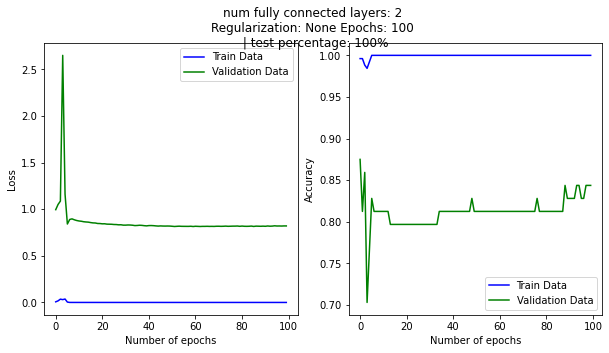

Train on 128 samples, validate on 32 samples
Epoch 1/100
128/128 [==============================] - 3s 20ms/sample - loss: 0.1092 - acc: 0.9609 - val_loss: 1.4740 - val_acc: 0.7188
Epoch 2/100
128/128 [==============================] - 0s 822us/sample - loss: 0.0768 - acc: 0.9766 - val_loss: 1.9035 - val_acc: 0.7500
Epoch 3/100
128/128 [==============================] - 0s 813us/sample - loss: 0.0223 - acc: 1.0000 - val_loss: 1.1593 - val_acc: 0.7500
Epoch 4/100
128/128 [==============================] - 0s 808us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 1.1838 - val_acc: 0.7812
Epoch 5/100
128/128 [==============================] - 0s 854us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 1.1447 - val_acc: 0.7188
Epoch 6/100
128/128 [==============================] - 0s 881us/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 1.0464 - val_acc: 0.7500
Epoch 7/100
128/128 [==============================] - 0s 788us/sample - loss: 6.9662e-04 - acc: 1.0000 - val_loss: 1.0937 - val_acc: 

128/128 [==============================] - 0s 756us/sample - loss: 1.6487e-04 - acc: 1.0000 - val_loss: 1.4475 - val_acc: 0.7500
Epoch 59/100
128/128 [==============================] - 0s 735us/sample - loss: 1.6270e-04 - acc: 1.0000 - val_loss: 1.4500 - val_acc: 0.7500
Epoch 60/100
128/128 [==============================] - 0s 750us/sample - loss: 1.6117e-04 - acc: 1.0000 - val_loss: 1.4495 - val_acc: 0.7500
Epoch 61/100
128/128 [==============================] - 0s 775us/sample - loss: 1.5939e-04 - acc: 1.0000 - val_loss: 1.4487 - val_acc: 0.7500
Epoch 62/100
128/128 [==============================] - 0s 761us/sample - loss: 1.5714e-04 - acc: 1.0000 - val_loss: 1.4555 - val_acc: 0.7500
Epoch 63/100
128/128 [==============================] - 0s 757us/sample - loss: 1.5484e-04 - acc: 1.0000 - val_loss: 1.4572 - val_acc: 0.7500
Epoch 64/100
128/128 [==============================] - 0s 756us/sample - loss: 1.5378e-04 - acc: 1.0000 - val_loss: 1.4546 - val_acc: 0.7500
Epoch 65/100
128/12

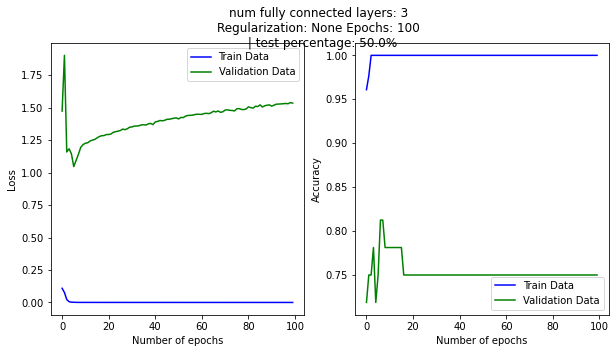

Train on 192 samples, validate on 48 samples
Epoch 1/100
192/192 [==============================] - 3s 13ms/sample - loss: 0.1256 - acc: 0.9635 - val_loss: 1.9894 - val_acc: 0.7500
Epoch 2/100
192/192 [==============================] - 0s 794us/sample - loss: 0.0457 - acc: 0.9844 - val_loss: 1.3733 - val_acc: 0.8333
Epoch 3/100
192/192 [==============================] - 0s 800us/sample - loss: 0.0058 - acc: 1.0000 - val_loss: 1.1091 - val_acc: 0.8750
Epoch 4/100
192/192 [==============================] - 0s 785us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 1.3193 - val_acc: 0.8333
Epoch 5/100
192/192 [==============================] - 0s 781us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 1.0117 - val_acc: 0.8542
Epoch 6/100
192/192 [==============================] - 0s 783us/sample - loss: 6.2466e-04 - acc: 1.0000 - val_loss: 1.0379 - val_acc: 0.8542
Epoch 7/100
192/192 [==============================] - 0s 768us/sample - loss: 5.6300e-04 - acc: 1.0000 - val_loss: 1.1013 - val_a

192/192 [==============================] - 0s 779us/sample - loss: 1.5190e-04 - acc: 1.0000 - val_loss: 1.3686 - val_acc: 0.8125
Epoch 59/100
192/192 [==============================] - 0s 808us/sample - loss: 1.5168e-04 - acc: 1.0000 - val_loss: 1.4023 - val_acc: 0.8125
Epoch 60/100
192/192 [==============================] - 0s 815us/sample - loss: 1.5081e-04 - acc: 1.0000 - val_loss: 1.3978 - val_acc: 0.8333
Epoch 61/100
192/192 [==============================] - 0s 820us/sample - loss: 1.4817e-04 - acc: 1.0000 - val_loss: 1.3957 - val_acc: 0.8125
Epoch 62/100
192/192 [==============================] - 0s 812us/sample - loss: 1.4328e-04 - acc: 1.0000 - val_loss: 1.4109 - val_acc: 0.8125
Epoch 63/100
192/192 [==============================] - 0s 804us/sample - loss: 1.4250e-04 - acc: 1.0000 - val_loss: 1.4048 - val_acc: 0.8125
Epoch 64/100
192/192 [==============================] - 0s 860us/sample - loss: 1.4038e-04 - acc: 1.0000 - val_loss: 1.4037 - val_acc: 0.8125
Epoch 65/100
192/19

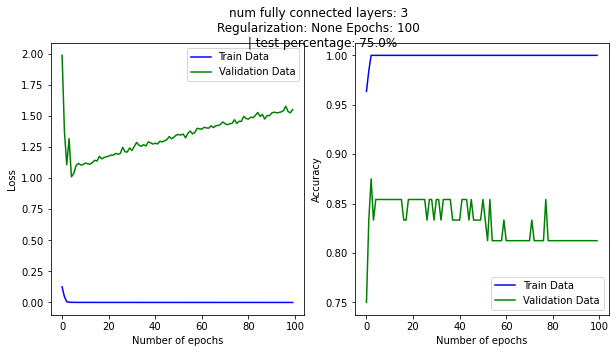

Train on 256 samples, validate on 64 samples
Epoch 1/100
256/256 [==============================] - 3s 10ms/sample - loss: 0.1805 - acc: 0.9375 - val_loss: 2.9187 - val_acc: 0.6562
Epoch 2/100
256/256 [==============================] - 0s 792us/sample - loss: 0.0372 - acc: 0.9844 - val_loss: 2.2259 - val_acc: 0.7344
Epoch 3/100
256/256 [==============================] - 0s 778us/sample - loss: 0.0235 - acc: 0.9961 - val_loss: 1.7389 - val_acc: 0.8125
Epoch 4/100
256/256 [==============================] - 0s 792us/sample - loss: 0.0347 - acc: 0.9883 - val_loss: 1.4879 - val_acc: 0.7812
Epoch 5/100
256/256 [==============================] - 0s 786us/sample - loss: 0.0334 - acc: 0.9883 - val_loss: 1.8614 - val_acc: 0.7656
Epoch 6/100
256/256 [==============================] - 0s 797us/sample - loss: 0.0212 - acc: 0.9883 - val_loss: 1.8024 - val_acc: 0.7500
Epoch 7/100
256/256 [==============================] - 0s 798us/sample - loss: 0.0280 - acc: 0.9844 - val_loss: 2.1714 - val_acc: 0.75

Epoch 59/100
256/256 [==============================] - 0s 751us/sample - loss: 1.3336e-04 - acc: 1.0000 - val_loss: 1.3569 - val_acc: 0.8594
Epoch 60/100
256/256 [==============================] - 0s 765us/sample - loss: 1.3108e-04 - acc: 1.0000 - val_loss: 1.3592 - val_acc: 0.8594
Epoch 61/100
256/256 [==============================] - 0s 758us/sample - loss: 1.2928e-04 - acc: 1.0000 - val_loss: 1.3616 - val_acc: 0.8594
Epoch 62/100
256/256 [==============================] - 0s 773us/sample - loss: 1.2814e-04 - acc: 1.0000 - val_loss: 1.3594 - val_acc: 0.8594
Epoch 63/100
256/256 [==============================] - 0s 788us/sample - loss: 1.2669e-04 - acc: 1.0000 - val_loss: 1.3609 - val_acc: 0.8594
Epoch 64/100
256/256 [==============================] - 0s 809us/sample - loss: 1.2485e-04 - acc: 1.0000 - val_loss: 1.3634 - val_acc: 0.8594
Epoch 65/100
256/256 [==============================] - 0s 800us/sample - loss: 1.2382e-04 - acc: 1.0000 - val_loss: 1.3682 - val_acc: 0.8594
Epoch 

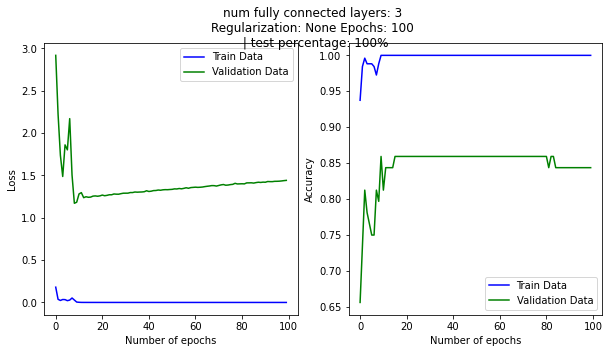

Train on 128 samples, validate on 32 samples
Epoch 1/100
128/128 [==============================] - 2s 19ms/sample - loss: 0.0693 - acc: 1.0000 - val_loss: 0.2505 - val_acc: 0.9375
Epoch 2/100
128/128 [==============================] - 0s 811us/sample - loss: 0.1104 - acc: 0.9688 - val_loss: 0.8333 - val_acc: 0.7500
Epoch 3/100
128/128 [==============================] - 0s 807us/sample - loss: 0.0998 - acc: 0.9688 - val_loss: 0.7462 - val_acc: 0.8125
Epoch 4/100
128/128 [==============================] - 0s 808us/sample - loss: 0.0652 - acc: 0.9766 - val_loss: 0.2161 - val_acc: 0.9375
Epoch 5/100
128/128 [==============================] - 0s 802us/sample - loss: 0.0635 - acc: 0.9922 - val_loss: 0.6215 - val_acc: 0.7812
Epoch 6/100
128/128 [==============================] - 0s 807us/sample - loss: 0.0758 - acc: 0.9844 - val_loss: 0.4870 - val_acc: 0.7812
Epoch 7/100
128/128 [==============================] - 0s 823us/sample - loss: 0.0353 - acc: 1.0000 - val_loss: 0.2323 - val_acc: 0.90

128/128 [==============================] - 0s 793us/sample - loss: 0.0226 - acc: 1.0000 - val_loss: 0.3842 - val_acc: 0.8750
Epoch 61/100
128/128 [==============================] - 0s 779us/sample - loss: 0.0226 - acc: 1.0000 - val_loss: 0.4033 - val_acc: 0.8438
Epoch 62/100
128/128 [==============================] - 0s 791us/sample - loss: 0.0225 - acc: 1.0000 - val_loss: 0.4100 - val_acc: 0.8750
Epoch 63/100
128/128 [==============================] - 0s 787us/sample - loss: 0.0224 - acc: 1.0000 - val_loss: 0.3923 - val_acc: 0.8750
Epoch 64/100
128/128 [==============================] - 0s 782us/sample - loss: 0.0223 - acc: 1.0000 - val_loss: 0.3948 - val_acc: 0.8750
Epoch 65/100
128/128 [==============================] - 0s 810us/sample - loss: 0.0223 - acc: 1.0000 - val_loss: 0.3855 - val_acc: 0.8750
Epoch 66/100
128/128 [==============================] - 0s 782us/sample - loss: 0.0222 - acc: 1.0000 - val_loss: 0.3869 - val_acc: 0.9062
Epoch 67/100
128/128 [=========================

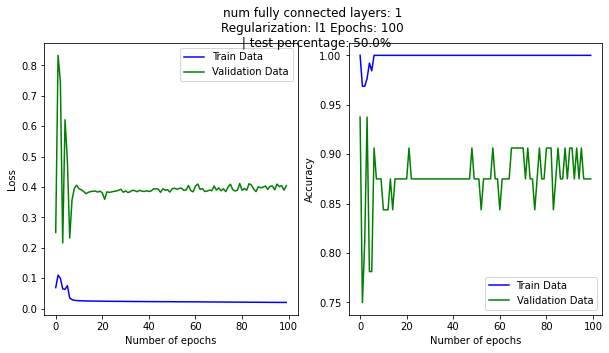

Train on 192 samples, validate on 48 samples
Epoch 1/100
192/192 [==============================] - 3s 13ms/sample - loss: 0.1322 - acc: 0.9688 - val_loss: 0.8840 - val_acc: 0.8542
Epoch 2/100
192/192 [==============================] - 0s 788us/sample - loss: 0.0515 - acc: 0.9896 - val_loss: 0.5085 - val_acc: 0.9167
Epoch 3/100
192/192 [==============================] - 0s 785us/sample - loss: 0.0580 - acc: 0.9844 - val_loss: 0.6399 - val_acc: 0.8958
Epoch 4/100
192/192 [==============================] - 0s 791us/sample - loss: 0.0506 - acc: 0.9948 - val_loss: 0.5211 - val_acc: 0.8958
Epoch 5/100
192/192 [==============================] - 0s 778us/sample - loss: 0.0291 - acc: 1.0000 - val_loss: 0.4436 - val_acc: 0.9167
Epoch 6/100
192/192 [==============================] - 0s 767us/sample - loss: 0.0247 - acc: 1.0000 - val_loss: 0.4516 - val_acc: 0.9167
Epoch 7/100
192/192 [==============================] - 0s 780us/sample - loss: 0.0238 - acc: 1.0000 - val_loss: 0.4524 - val_acc: 0.91

192/192 [==============================] - 0s 873us/sample - loss: 0.0188 - acc: 1.0000 - val_loss: 0.4509 - val_acc: 0.9167
Epoch 61/100
192/192 [==============================] - 0s 869us/sample - loss: 0.0187 - acc: 1.0000 - val_loss: 0.4628 - val_acc: 0.9167
Epoch 62/100
192/192 [==============================] - 0s 880us/sample - loss: 0.0187 - acc: 1.0000 - val_loss: 0.4422 - val_acc: 0.9167
Epoch 63/100
192/192 [==============================] - 0s 889us/sample - loss: 0.0187 - acc: 1.0000 - val_loss: 0.4708 - val_acc: 0.9167
Epoch 64/100
192/192 [==============================] - 0s 885us/sample - loss: 0.0186 - acc: 1.0000 - val_loss: 0.4737 - val_acc: 0.9167
Epoch 65/100
192/192 [==============================] - 0s 897us/sample - loss: 0.0185 - acc: 1.0000 - val_loss: 0.4597 - val_acc: 0.9167
Epoch 66/100
192/192 [==============================] - 0s 909us/sample - loss: 0.0185 - acc: 1.0000 - val_loss: 0.4577 - val_acc: 0.9167
Epoch 67/100
192/192 [=========================

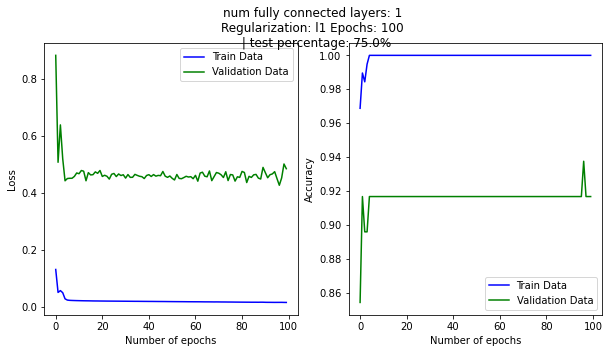

Train on 256 samples, validate on 64 samples
Epoch 1/100
256/256 [==============================] - 3s 10ms/sample - loss: 0.1308 - acc: 0.9570 - val_loss: 0.9897 - val_acc: 0.7812
Epoch 2/100
256/256 [==============================] - 0s 794us/sample - loss: 0.0319 - acc: 1.0000 - val_loss: 0.4488 - val_acc: 0.9219
Epoch 3/100
256/256 [==============================] - 0s 776us/sample - loss: 0.0247 - acc: 1.0000 - val_loss: 0.3776 - val_acc: 0.9062
Epoch 4/100
256/256 [==============================] - 0s 787us/sample - loss: 0.0218 - acc: 1.0000 - val_loss: 0.4284 - val_acc: 0.9062
Epoch 5/100
256/256 [==============================] - 0s 762us/sample - loss: 0.0195 - acc: 1.0000 - val_loss: 0.3816 - val_acc: 0.9375
Epoch 6/100
256/256 [==============================] - 0s 810us/sample - loss: 0.0190 - acc: 1.0000 - val_loss: 0.3885 - val_acc: 0.9375
Epoch 7/100
256/256 [==============================] - 0s 783us/sample - loss: 0.0186 - acc: 1.0000 - val_loss: 0.3887 - val_acc: 0.92

256/256 [==============================] - 0s 818us/sample - loss: 0.0146 - acc: 1.0000 - val_loss: 0.3803 - val_acc: 0.9375
Epoch 61/100
256/256 [==============================] - 0s 845us/sample - loss: 0.0147 - acc: 1.0000 - val_loss: 0.3809 - val_acc: 0.9531
Epoch 62/100
256/256 [==============================] - 0s 838us/sample - loss: 0.0146 - acc: 1.0000 - val_loss: 0.3927 - val_acc: 0.9375
Epoch 63/100
256/256 [==============================] - 0s 841us/sample - loss: 0.0145 - acc: 1.0000 - val_loss: 0.3621 - val_acc: 0.9375
Epoch 64/100
256/256 [==============================] - 0s 835us/sample - loss: 0.0144 - acc: 1.0000 - val_loss: 0.3924 - val_acc: 0.9531
Epoch 65/100
256/256 [==============================] - 0s 862us/sample - loss: 0.0143 - acc: 1.0000 - val_loss: 0.3703 - val_acc: 0.9375
Epoch 66/100
256/256 [==============================] - 0s 851us/sample - loss: 0.0143 - acc: 1.0000 - val_loss: 0.3859 - val_acc: 0.9219
Epoch 67/100
256/256 [=========================

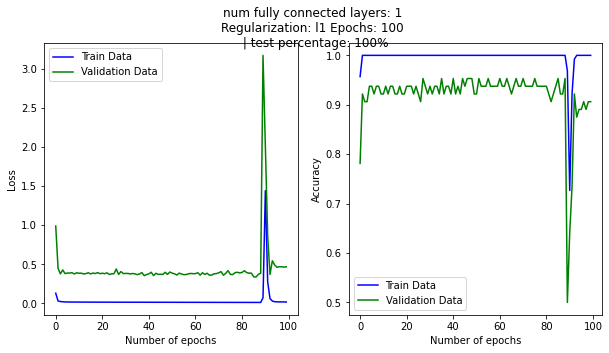

Train on 128 samples, validate on 32 samples
Epoch 1/100
128/128 [==============================] - 2s 19ms/sample - loss: 0.2337 - acc: 0.9453 - val_loss: 0.5139 - val_acc: 0.8438
Epoch 2/100
128/128 [==============================] - 0s 857us/sample - loss: 0.1476 - acc: 0.9609 - val_loss: 0.7111 - val_acc: 0.8438
Epoch 3/100
128/128 [==============================] - 0s 844us/sample - loss: 0.1034 - acc: 0.9766 - val_loss: 0.3488 - val_acc: 0.8750
Epoch 4/100
128/128 [==============================] - 0s 832us/sample - loss: 0.0464 - acc: 1.0000 - val_loss: 0.3295 - val_acc: 0.9375
Epoch 5/100
128/128 [==============================] - 0s 821us/sample - loss: 0.0337 - acc: 1.0000 - val_loss: 0.2756 - val_acc: 0.9062
Epoch 6/100
128/128 [==============================] - 0s 866us/sample - loss: 0.0294 - acc: 1.0000 - val_loss: 0.2891 - val_acc: 0.9062
Epoch 7/100
128/128 [==============================] - 0s 826us/sample - loss: 0.0283 - acc: 1.0000 - val_loss: 0.2817 - val_acc: 0.90

128/128 [==============================] - 0s 860us/sample - loss: 0.0241 - acc: 1.0000 - val_loss: 0.3983 - val_acc: 0.8750
Epoch 61/100
128/128 [==============================] - 0s 850us/sample - loss: 0.0240 - acc: 1.0000 - val_loss: 0.3996 - val_acc: 0.8750
Epoch 62/100
128/128 [==============================] - 0s 825us/sample - loss: 0.0240 - acc: 1.0000 - val_loss: 0.4074 - val_acc: 0.8750
Epoch 63/100
128/128 [==============================] - 0s 827us/sample - loss: 0.0240 - acc: 1.0000 - val_loss: 0.4095 - val_acc: 0.8750
Epoch 64/100
128/128 [==============================] - 0s 833us/sample - loss: 0.0239 - acc: 1.0000 - val_loss: 0.4081 - val_acc: 0.8750
Epoch 65/100
128/128 [==============================] - 0s 833us/sample - loss: 0.0239 - acc: 1.0000 - val_loss: 0.4139 - val_acc: 0.8750
Epoch 66/100
128/128 [==============================] - 0s 839us/sample - loss: 0.0239 - acc: 1.0000 - val_loss: 0.3943 - val_acc: 0.8750
Epoch 67/100
128/128 [=========================

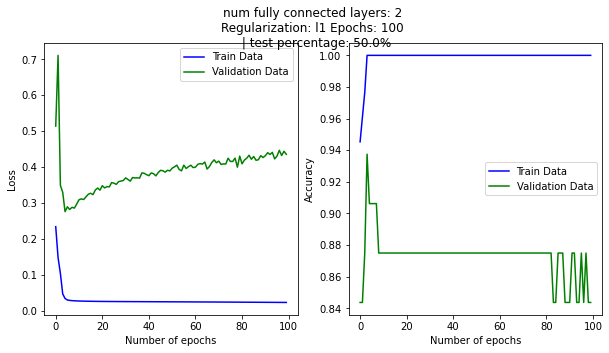

Train on 192 samples, validate on 48 samples
Epoch 1/100
192/192 [==============================] - 3s 14ms/sample - loss: 0.1634 - acc: 0.9375 - val_loss: 0.8486 - val_acc: 0.7917
Epoch 2/100
192/192 [==============================] - 0s 929us/sample - loss: 0.0932 - acc: 0.9688 - val_loss: 0.3602 - val_acc: 0.8333
Epoch 3/100
192/192 [==============================] - 0s 796us/sample - loss: 0.0437 - acc: 0.9948 - val_loss: 0.2771 - val_acc: 0.9167
Epoch 4/100
192/192 [==============================] - 0s 789us/sample - loss: 0.0314 - acc: 1.0000 - val_loss: 0.4455 - val_acc: 0.8542
Epoch 5/100
192/192 [==============================] - 0s 801us/sample - loss: 0.0259 - acc: 1.0000 - val_loss: 0.4058 - val_acc: 0.8542
Epoch 6/100
192/192 [==============================] - 0s 892us/sample - loss: 0.0246 - acc: 1.0000 - val_loss: 0.3186 - val_acc: 0.8750
Epoch 7/100
192/192 [==============================] - 0s 784us/sample - loss: 0.0242 - acc: 1.0000 - val_loss: 0.3246 - val_acc: 0.89

192/192 [==============================] - 0s 881us/sample - loss: 0.0207 - acc: 1.0000 - val_loss: 0.3974 - val_acc: 0.8750
Epoch 61/100
192/192 [==============================] - 0s 899us/sample - loss: 0.0207 - acc: 1.0000 - val_loss: 0.4019 - val_acc: 0.8750
Epoch 62/100
192/192 [==============================] - 0s 884us/sample - loss: 0.0206 - acc: 1.0000 - val_loss: 0.4071 - val_acc: 0.8750
Epoch 63/100
192/192 [==============================] - 0s 886us/sample - loss: 0.0205 - acc: 1.0000 - val_loss: 0.3943 - val_acc: 0.8750
Epoch 64/100
192/192 [==============================] - 0s 881us/sample - loss: 0.0205 - acc: 1.0000 - val_loss: 0.3988 - val_acc: 0.8750
Epoch 65/100
192/192 [==============================] - 0s 880us/sample - loss: 0.0204 - acc: 1.0000 - val_loss: 0.3943 - val_acc: 0.8750
Epoch 66/100
192/192 [==============================] - 0s 883us/sample - loss: 0.0204 - acc: 1.0000 - val_loss: 0.4147 - val_acc: 0.8750
Epoch 67/100
192/192 [=========================

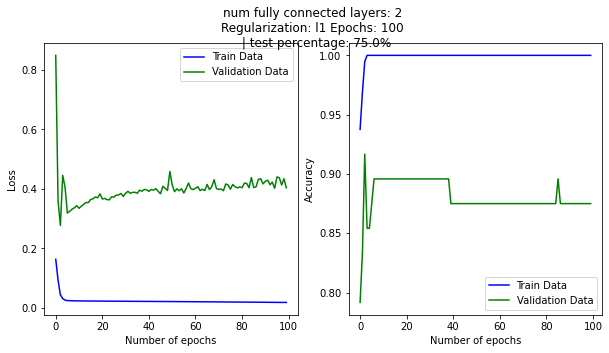

Train on 256 samples, validate on 64 samples
Epoch 1/100
256/256 [==============================] - 3s 10ms/sample - loss: 0.1584 - acc: 0.9414 - val_loss: 0.8055 - val_acc: 0.8438
Epoch 2/100
256/256 [==============================] - 0s 815us/sample - loss: 0.0860 - acc: 0.9688 - val_loss: 0.5103 - val_acc: 0.8438
Epoch 3/100
256/256 [==============================] - 0s 823us/sample - loss: 0.0532 - acc: 0.9961 - val_loss: 0.3397 - val_acc: 0.9219
Epoch 4/100
256/256 [==============================] - 0s 831us/sample - loss: 0.0387 - acc: 0.9961 - val_loss: 0.3430 - val_acc: 0.9062
Epoch 5/100
256/256 [==============================] - 0s 823us/sample - loss: 0.0218 - acc: 1.0000 - val_loss: 0.3534 - val_acc: 0.8906
Epoch 6/100
256/256 [==============================] - 0s 822us/sample - loss: 0.0205 - acc: 1.0000 - val_loss: 0.3551 - val_acc: 0.9062
Epoch 7/100
256/256 [==============================] - 0s 841us/sample - loss: 0.0201 - acc: 1.0000 - val_loss: 0.3547 - val_acc: 0.90

256/256 [==============================] - 0s 868us/sample - loss: 0.0172 - acc: 1.0000 - val_loss: 0.4266 - val_acc: 0.9062
Epoch 61/100
256/256 [==============================] - 0s 866us/sample - loss: 0.0171 - acc: 1.0000 - val_loss: 0.4226 - val_acc: 0.9062
Epoch 62/100
256/256 [==============================] - 0s 863us/sample - loss: 0.0171 - acc: 1.0000 - val_loss: 0.4239 - val_acc: 0.9062
Epoch 63/100
256/256 [==============================] - 0s 893us/sample - loss: 0.0171 - acc: 1.0000 - val_loss: 0.4128 - val_acc: 0.9062
Epoch 64/100
256/256 [==============================] - 0s 885us/sample - loss: 0.0170 - acc: 1.0000 - val_loss: 0.4345 - val_acc: 0.9062
Epoch 65/100
256/256 [==============================] - 0s 892us/sample - loss: 0.0170 - acc: 1.0000 - val_loss: 0.4222 - val_acc: 0.9062
Epoch 66/100
256/256 [==============================] - 0s 894us/sample - loss: 0.0169 - acc: 1.0000 - val_loss: 0.4244 - val_acc: 0.9062
Epoch 67/100
256/256 [=========================

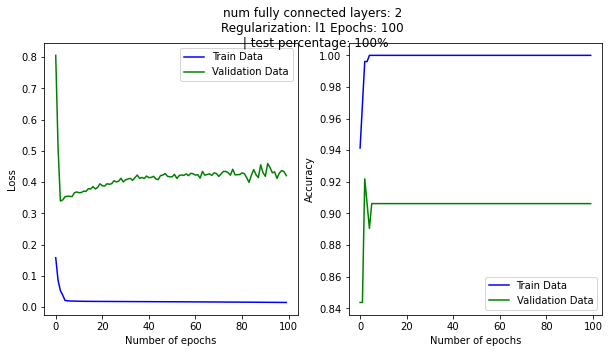

Train on 128 samples, validate on 32 samples
Epoch 1/100
128/128 [==============================] - 3s 23ms/sample - loss: 0.0376 - acc: 1.0000 - val_loss: 0.5236 - val_acc: 0.8438
Epoch 2/100
128/128 [==============================] - 0s 833us/sample - loss: 0.0552 - acc: 0.9922 - val_loss: 0.5191 - val_acc: 0.9062
Epoch 3/100
128/128 [==============================] - 0s 825us/sample - loss: 0.0688 - acc: 0.9844 - val_loss: 0.4470 - val_acc: 0.8125
Epoch 4/100
128/128 [==============================] - 0s 840us/sample - loss: 0.0623 - acc: 0.9922 - val_loss: 0.5865 - val_acc: 0.8750
Epoch 5/100
128/128 [==============================] - 0s 844us/sample - loss: 0.0440 - acc: 1.0000 - val_loss: 0.9739 - val_acc: 0.7812
Epoch 6/100
128/128 [==============================] - 0s 833us/sample - loss: 0.0351 - acc: 1.0000 - val_loss: 1.0750 - val_acc: 0.8125
Epoch 7/100
128/128 [==============================] - 0s 830us/sample - loss: 0.0307 - acc: 1.0000 - val_loss: 0.8124 - val_acc: 0.84

128/128 [==============================] - 0s 911us/sample - loss: 0.0248 - acc: 1.0000 - val_loss: 0.6435 - val_acc: 0.8750
Epoch 61/100
128/128 [==============================] - 0s 917us/sample - loss: 0.0247 - acc: 1.0000 - val_loss: 0.6433 - val_acc: 0.8750
Epoch 62/100
128/128 [==============================] - 0s 918us/sample - loss: 0.0246 - acc: 1.0000 - val_loss: 0.6456 - val_acc: 0.8750
Epoch 63/100
128/128 [==============================] - 0s 892us/sample - loss: 0.0246 - acc: 1.0000 - val_loss: 0.6433 - val_acc: 0.8750
Epoch 64/100
128/128 [==============================] - 0s 930us/sample - loss: 0.0245 - acc: 1.0000 - val_loss: 0.6377 - val_acc: 0.8750
Epoch 65/100
128/128 [==============================] - 0s 917us/sample - loss: 0.0244 - acc: 1.0000 - val_loss: 0.6399 - val_acc: 0.8750
Epoch 66/100
128/128 [==============================] - 0s 874us/sample - loss: 0.0243 - acc: 1.0000 - val_loss: 0.6346 - val_acc: 0.8750
Epoch 67/100
128/128 [=========================

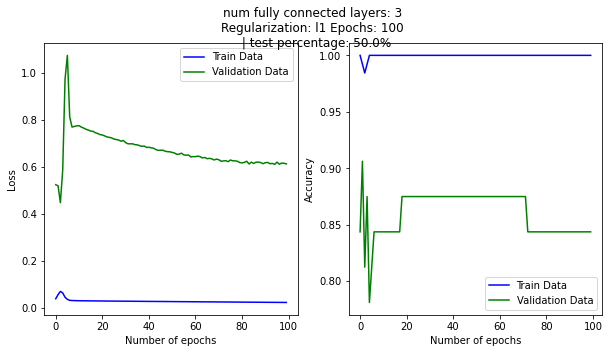

Train on 192 samples, validate on 48 samples
Epoch 1/100
192/192 [==============================] - 3s 15ms/sample - loss: 0.0732 - acc: 0.9844 - val_loss: 1.1168 - val_acc: 0.8125
Epoch 2/100
192/192 [==============================] - 0s 835us/sample - loss: 0.0791 - acc: 0.9688 - val_loss: 0.8405 - val_acc: 0.8542
Epoch 3/100
192/192 [==============================] - 0s 795us/sample - loss: 0.0356 - acc: 1.0000 - val_loss: 0.8023 - val_acc: 0.8542
Epoch 4/100
192/192 [==============================] - 0s 815us/sample - loss: 0.0252 - acc: 1.0000 - val_loss: 0.6894 - val_acc: 0.8750
Epoch 5/100
192/192 [==============================] - 0s 810us/sample - loss: 0.0240 - acc: 1.0000 - val_loss: 0.6935 - val_acc: 0.8542
Epoch 6/100
192/192 [==============================] - 0s 837us/sample - loss: 0.0236 - acc: 1.0000 - val_loss: 0.6825 - val_acc: 0.8542
Epoch 7/100
192/192 [==============================] - 0s 767us/sample - loss: 0.0234 - acc: 1.0000 - val_loss: 0.6708 - val_acc: 0.85

192/192 [==============================] - 0s 979us/sample - loss: 0.0204 - acc: 1.0000 - val_loss: 0.5706 - val_acc: 0.8750
Epoch 61/100
192/192 [==============================] - 0s 930us/sample - loss: 0.0203 - acc: 1.0000 - val_loss: 0.5796 - val_acc: 0.8750
Epoch 62/100
192/192 [==============================] - 0s 939us/sample - loss: 0.0203 - acc: 1.0000 - val_loss: 0.5752 - val_acc: 0.8750
Epoch 63/100
192/192 [==============================] - 0s 931us/sample - loss: 0.0202 - acc: 1.0000 - val_loss: 0.5689 - val_acc: 0.8750
Epoch 64/100
192/192 [==============================] - 0s 957us/sample - loss: 0.0202 - acc: 1.0000 - val_loss: 0.5673 - val_acc: 0.8750
Epoch 65/100
192/192 [==============================] - 0s 1ms/sample - loss: 0.0201 - acc: 1.0000 - val_loss: 0.5815 - val_acc: 0.8750
Epoch 66/100
192/192 [==============================] - 0s 938us/sample - loss: 0.0201 - acc: 1.0000 - val_loss: 0.5723 - val_acc: 0.8750
Epoch 67/100
192/192 [===========================

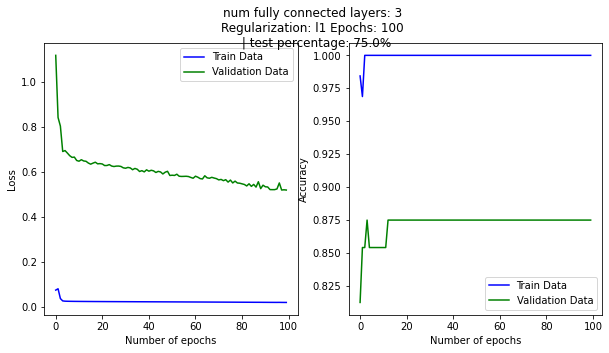

Train on 256 samples, validate on 64 samples
Epoch 1/100
256/256 [==============================] - 3s 11ms/sample - loss: 0.0765 - acc: 0.9805 - val_loss: 0.6109 - val_acc: 0.8594
Epoch 2/100
256/256 [==============================] - 0s 949us/sample - loss: 0.0502 - acc: 0.9922 - val_loss: 0.8894 - val_acc: 0.8281
Epoch 3/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0294 - acc: 1.0000 - val_loss: 0.7279 - val_acc: 0.8281
Epoch 4/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0213 - acc: 1.0000 - val_loss: 0.6853 - val_acc: 0.8281
Epoch 5/100
256/256 [==============================] - 0s 852us/sample - loss: 0.0201 - acc: 1.0000 - val_loss: 0.6865 - val_acc: 0.8281
Epoch 6/100
256/256 [==============================] - 0s 828us/sample - loss: 0.0198 - acc: 1.0000 - val_loss: 0.6853 - val_acc: 0.8281
Epoch 7/100
256/256 [==============================] - 0s 835us/sample - loss: 0.0196 - acc: 1.0000 - val_loss: 0.6910 - val_acc: 0.8281
E

256/256 [==============================] - 0s 1ms/sample - loss: 0.0172 - acc: 1.0000 - val_loss: 0.6346 - val_acc: 0.8438
Epoch 61/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0172 - acc: 1.0000 - val_loss: 0.6363 - val_acc: 0.8438
Epoch 62/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0171 - acc: 1.0000 - val_loss: 0.6315 - val_acc: 0.8438
Epoch 63/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0171 - acc: 1.0000 - val_loss: 0.6367 - val_acc: 0.8438
Epoch 64/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0171 - acc: 1.0000 - val_loss: 0.6319 - val_acc: 0.8438
Epoch 65/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0170 - acc: 1.0000 - val_loss: 0.6337 - val_acc: 0.8438
Epoch 66/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0170 - acc: 1.0000 - val_loss: 0.6261 - val_acc: 0.8438
Epoch 67/100
256/256 [==============================] - 0s 1m

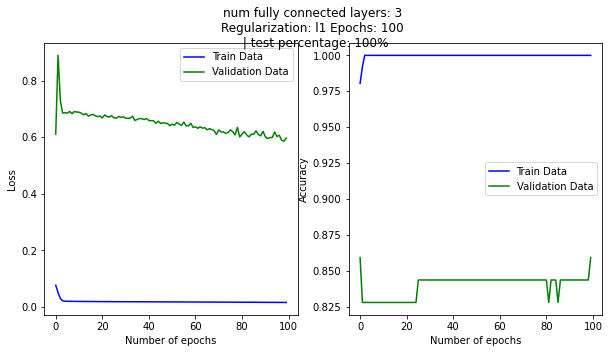

Train on 128 samples, validate on 32 samples
Epoch 1/100
128/128 [==============================] - 3s 21ms/sample - loss: 0.1076 - acc: 0.9844 - val_loss: 0.3246 - val_acc: 0.8438
Epoch 2/100
128/128 [==============================] - 0s 883us/sample - loss: 0.1345 - acc: 0.9531 - val_loss: 0.2342 - val_acc: 0.9375
Epoch 3/100
128/128 [==============================] - 0s 859us/sample - loss: 0.1236 - acc: 0.9688 - val_loss: 0.3142 - val_acc: 0.9062
Epoch 4/100
128/128 [==============================] - 0s 834us/sample - loss: 0.1333 - acc: 0.9531 - val_loss: 0.2987 - val_acc: 0.9375
Epoch 5/100
128/128 [==============================] - 0s 831us/sample - loss: 0.1354 - acc: 0.9609 - val_loss: 0.2339 - val_acc: 0.9375
Epoch 6/100
128/128 [==============================] - 0s 864us/sample - loss: 0.1163 - acc: 0.9688 - val_loss: 0.1947 - val_acc: 0.9688
Epoch 7/100
128/128 [==============================] - 0s 857us/sample - loss: 0.1172 - acc: 0.9531 - val_loss: 0.2448 - val_acc: 0.90

128/128 [==============================] - 0s 852us/sample - loss: 0.0588 - acc: 0.9844 - val_loss: 0.3092 - val_acc: 0.8438
Epoch 61/100
128/128 [==============================] - 0s 840us/sample - loss: 0.1138 - acc: 0.9531 - val_loss: 0.3224 - val_acc: 0.9062
Epoch 62/100
128/128 [==============================] - 0s 821us/sample - loss: 0.0693 - acc: 0.9844 - val_loss: 0.3292 - val_acc: 0.9375
Epoch 63/100
128/128 [==============================] - 0s 824us/sample - loss: 0.0889 - acc: 0.9766 - val_loss: 0.3261 - val_acc: 0.9062
Epoch 64/100
128/128 [==============================] - 0s 829us/sample - loss: 0.1096 - acc: 0.9688 - val_loss: 0.3361 - val_acc: 0.8750
Epoch 65/100
128/128 [==============================] - 0s 821us/sample - loss: 0.1190 - acc: 0.9766 - val_loss: 0.3596 - val_acc: 0.8750
Epoch 66/100
128/128 [==============================] - 0s 811us/sample - loss: 0.1071 - acc: 0.9609 - val_loss: 0.4055 - val_acc: 0.8438
Epoch 67/100
128/128 [=========================

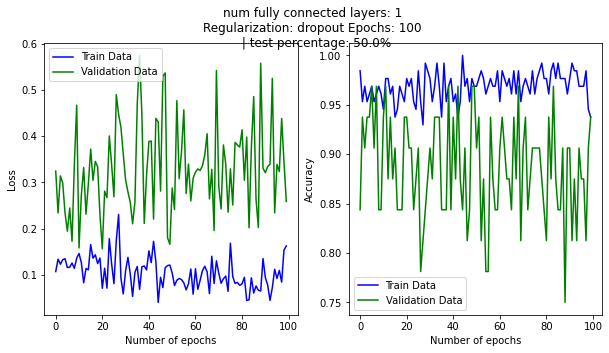

Train on 192 samples, validate on 48 samples
Epoch 1/100
192/192 [==============================] - 3s 15ms/sample - loss: 0.1636 - acc: 0.9531 - val_loss: 0.6290 - val_acc: 0.8542
Epoch 2/100
192/192 [==============================] - 0s 787us/sample - loss: 0.1151 - acc: 0.9531 - val_loss: 0.4068 - val_acc: 0.9375
Epoch 3/100
192/192 [==============================] - 0s 782us/sample - loss: 0.0781 - acc: 0.9844 - val_loss: 0.6467 - val_acc: 0.8750
Epoch 4/100
192/192 [==============================] - 0s 784us/sample - loss: 0.1310 - acc: 0.9635 - val_loss: 0.6250 - val_acc: 0.8750
Epoch 5/100
192/192 [==============================] - 0s 778us/sample - loss: 0.1673 - acc: 0.9531 - val_loss: 0.3980 - val_acc: 0.9167
Epoch 6/100
192/192 [==============================] - 0s 785us/sample - loss: 0.0847 - acc: 0.9844 - val_loss: 0.5804 - val_acc: 0.8750
Epoch 7/100
192/192 [==============================] - 0s 775us/sample - loss: 0.1039 - acc: 0.9688 - val_loss: 0.4515 - val_acc: 0.89

192/192 [==============================] - 0s 889us/sample - loss: 0.1121 - acc: 0.9583 - val_loss: 0.6038 - val_acc: 0.8958
Epoch 61/100
192/192 [==============================] - 0s 876us/sample - loss: 0.0803 - acc: 0.9844 - val_loss: 0.5555 - val_acc: 0.8542
Epoch 62/100
192/192 [==============================] - 0s 884us/sample - loss: 0.0557 - acc: 0.9844 - val_loss: 0.6085 - val_acc: 0.8542
Epoch 63/100
192/192 [==============================] - 0s 889us/sample - loss: 0.0676 - acc: 0.9844 - val_loss: 0.5969 - val_acc: 0.8958
Epoch 64/100
192/192 [==============================] - 0s 879us/sample - loss: 0.0398 - acc: 1.0000 - val_loss: 0.6367 - val_acc: 0.8542
Epoch 65/100
192/192 [==============================] - 0s 898us/sample - loss: 0.0845 - acc: 0.9740 - val_loss: 0.5812 - val_acc: 0.8750
Epoch 66/100
192/192 [==============================] - 0s 886us/sample - loss: 0.0660 - acc: 0.9792 - val_loss: 0.5006 - val_acc: 0.8958
Epoch 67/100
192/192 [=========================

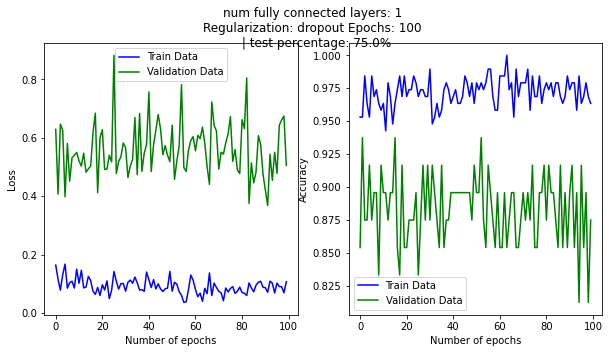

Train on 256 samples, validate on 64 samples
Epoch 1/100
256/256 [==============================] - 3s 11ms/sample - loss: 0.0564 - acc: 0.9883 - val_loss: 0.6765 - val_acc: 0.8438
Epoch 2/100
256/256 [==============================] - 0s 831us/sample - loss: 0.0813 - acc: 0.9727 - val_loss: 0.9457 - val_acc: 0.8281
Epoch 3/100
256/256 [==============================] - 0s 789us/sample - loss: 0.0995 - acc: 0.9648 - val_loss: 0.9016 - val_acc: 0.8125
Epoch 4/100
256/256 [==============================] - 0s 819us/sample - loss: 0.1014 - acc: 0.9805 - val_loss: 0.6105 - val_acc: 0.8281
Epoch 5/100
256/256 [==============================] - 0s 819us/sample - loss: 0.0699 - acc: 0.9766 - val_loss: 0.7366 - val_acc: 0.8125
Epoch 6/100
256/256 [==============================] - 0s 820us/sample - loss: 0.0880 - acc: 0.9688 - val_loss: 0.7416 - val_acc: 0.8594
Epoch 7/100
256/256 [==============================] - 0s 804us/sample - loss: 0.0745 - acc: 0.9805 - val_loss: 0.5973 - val_acc: 0.89

256/256 [==============================] - 0s 876us/sample - loss: 0.0871 - acc: 0.9688 - val_loss: 0.8430 - val_acc: 0.8438
Epoch 61/100
256/256 [==============================] - 0s 921us/sample - loss: 0.0713 - acc: 0.9844 - val_loss: 0.6641 - val_acc: 0.8750
Epoch 62/100
256/256 [==============================] - 0s 881us/sample - loss: 0.0489 - acc: 0.9922 - val_loss: 0.7112 - val_acc: 0.8906
Epoch 63/100
256/256 [==============================] - 0s 890us/sample - loss: 0.0905 - acc: 0.9688 - val_loss: 1.0175 - val_acc: 0.8281
Epoch 64/100
256/256 [==============================] - 0s 904us/sample - loss: 0.0350 - acc: 0.9961 - val_loss: 0.6863 - val_acc: 0.8750
Epoch 65/100
256/256 [==============================] - 0s 913us/sample - loss: 0.0390 - acc: 0.9883 - val_loss: 0.6827 - val_acc: 0.8438
Epoch 66/100
256/256 [==============================] - 0s 923us/sample - loss: 0.0372 - acc: 0.9844 - val_loss: 0.6703 - val_acc: 0.8750
Epoch 67/100
256/256 [=========================

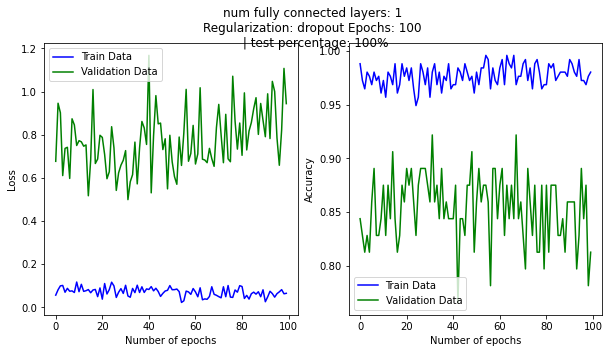

Train on 128 samples, validate on 32 samples
Epoch 1/100
128/128 [==============================] - 3s 21ms/sample - loss: 0.2677 - acc: 0.9062 - val_loss: 0.7466 - val_acc: 0.8125
Epoch 2/100
128/128 [==============================] - 0s 858us/sample - loss: 0.2765 - acc: 0.9219 - val_loss: 0.5245 - val_acc: 0.8750
Epoch 3/100
128/128 [==============================] - 0s 909us/sample - loss: 0.2923 - acc: 0.8828 - val_loss: 0.2626 - val_acc: 0.9062
Epoch 4/100
128/128 [==============================] - 0s 852us/sample - loss: 0.2386 - acc: 0.9219 - val_loss: 0.3987 - val_acc: 0.8125
Epoch 5/100
128/128 [==============================] - 0s 893us/sample - loss: 0.1296 - acc: 0.9531 - val_loss: 0.5475 - val_acc: 0.8125
Epoch 6/100
128/128 [==============================] - 0s 820us/sample - loss: 0.2385 - acc: 0.9141 - val_loss: 0.4295 - val_acc: 0.8438
Epoch 7/100
128/128 [==============================] - 0s 913us/sample - loss: 0.2563 - acc: 0.9141 - val_loss: 0.3412 - val_acc: 0.87

128/128 [==============================] - 0s 880us/sample - loss: 0.2286 - acc: 0.9453 - val_loss: 0.6844 - val_acc: 0.8125
Epoch 61/100
128/128 [==============================] - 0s 878us/sample - loss: 0.1251 - acc: 0.9766 - val_loss: 0.8101 - val_acc: 0.7812
Epoch 62/100
128/128 [==============================] - 0s 886us/sample - loss: 0.2156 - acc: 0.9219 - val_loss: 0.4524 - val_acc: 0.8438
Epoch 63/100
128/128 [==============================] - 0s 873us/sample - loss: 0.1905 - acc: 0.9609 - val_loss: 0.3865 - val_acc: 0.8438
Epoch 64/100
128/128 [==============================] - 0s 885us/sample - loss: 0.1738 - acc: 0.9453 - val_loss: 0.3601 - val_acc: 0.8438
Epoch 65/100
128/128 [==============================] - 0s 882us/sample - loss: 0.1580 - acc: 0.9609 - val_loss: 0.5232 - val_acc: 0.8750
Epoch 66/100
128/128 [==============================] - 0s 850us/sample - loss: 0.1704 - acc: 0.9453 - val_loss: 0.7506 - val_acc: 0.7812
Epoch 67/100
128/128 [=========================

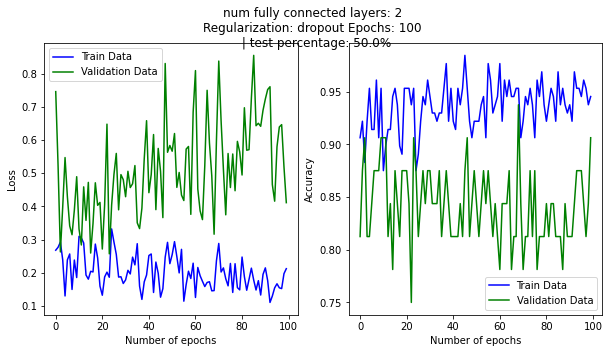

Train on 192 samples, validate on 48 samples
Epoch 1/100
192/192 [==============================] - 3s 17ms/sample - loss: 0.3301 - acc: 0.9167 - val_loss: 0.6091 - val_acc: 0.8542
Epoch 2/100
192/192 [==============================] - 0s 902us/sample - loss: 0.3449 - acc: 0.9010 - val_loss: 0.5111 - val_acc: 0.8750
Epoch 3/100
192/192 [==============================] - 0s 884us/sample - loss: 0.2144 - acc: 0.9219 - val_loss: 0.5340 - val_acc: 0.8542
Epoch 4/100
192/192 [==============================] - 0s 885us/sample - loss: 0.2101 - acc: 0.9375 - val_loss: 0.7423 - val_acc: 0.8333
Epoch 5/100
192/192 [==============================] - 0s 896us/sample - loss: 0.2081 - acc: 0.9271 - val_loss: 0.5752 - val_acc: 0.8542
Epoch 6/100
192/192 [==============================] - 0s 879us/sample - loss: 0.3116 - acc: 0.9062 - val_loss: 0.4206 - val_acc: 0.8958
Epoch 7/100
192/192 [==============================] - 0s 870us/sample - loss: 0.1887 - acc: 0.9427 - val_loss: 0.4761 - val_acc: 0.85

192/192 [==============================] - 0s 919us/sample - loss: 0.1244 - acc: 0.9688 - val_loss: 0.9951 - val_acc: 0.8125
Epoch 61/100
192/192 [==============================] - 0s 907us/sample - loss: 0.1357 - acc: 0.9635 - val_loss: 0.7668 - val_acc: 0.8333
Epoch 62/100
192/192 [==============================] - 0s 932us/sample - loss: 0.1298 - acc: 0.9479 - val_loss: 0.4493 - val_acc: 0.9167
Epoch 63/100
192/192 [==============================] - 0s 923us/sample - loss: 0.1096 - acc: 0.9792 - val_loss: 0.5855 - val_acc: 0.8958
Epoch 64/100
192/192 [==============================] - 0s 929us/sample - loss: 0.1668 - acc: 0.9479 - val_loss: 0.6063 - val_acc: 0.8542
Epoch 65/100
192/192 [==============================] - 0s 940us/sample - loss: 0.1405 - acc: 0.9427 - val_loss: 0.7170 - val_acc: 0.8542
Epoch 66/100
192/192 [==============================] - 0s 942us/sample - loss: 0.1272 - acc: 0.9740 - val_loss: 0.5106 - val_acc: 0.8958
Epoch 67/100
192/192 [=========================

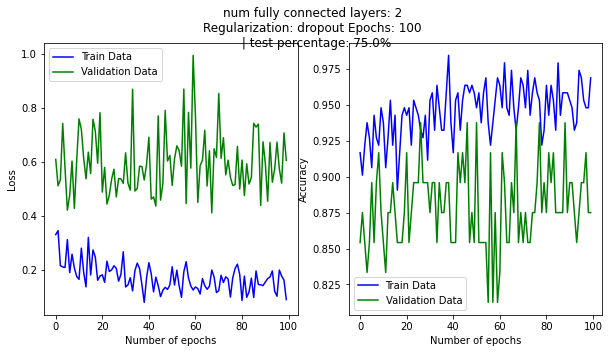

Train on 256 samples, validate on 64 samples
Epoch 1/100
256/256 [==============================] - 3s 11ms/sample - loss: 0.2265 - acc: 0.9141 - val_loss: 0.6937 - val_acc: 0.8438
Epoch 2/100
256/256 [==============================] - 0s 833us/sample - loss: 0.1917 - acc: 0.9297 - val_loss: 0.6609 - val_acc: 0.8438
Epoch 3/100
256/256 [==============================] - 0s 847us/sample - loss: 0.1462 - acc: 0.9570 - val_loss: 0.7653 - val_acc: 0.8438
Epoch 4/100
256/256 [==============================] - 0s 831us/sample - loss: 0.0867 - acc: 0.9727 - val_loss: 0.5851 - val_acc: 0.9062
Epoch 5/100
256/256 [==============================] - 0s 811us/sample - loss: 0.2006 - acc: 0.9492 - val_loss: 0.6319 - val_acc: 0.8594
Epoch 6/100
256/256 [==============================] - 0s 842us/sample - loss: 0.1589 - acc: 0.9609 - val_loss: 0.5272 - val_acc: 0.9062
Epoch 7/100
256/256 [==============================] - 0s 826us/sample - loss: 0.1735 - acc: 0.9492 - val_loss: 0.7377 - val_acc: 0.81

256/256 [==============================] - 0s 978us/sample - loss: 0.2081 - acc: 0.9336 - val_loss: 0.5513 - val_acc: 0.8594
Epoch 61/100
256/256 [==============================] - 0s 966us/sample - loss: 0.0984 - acc: 0.9570 - val_loss: 0.8041 - val_acc: 0.8125
Epoch 62/100
256/256 [==============================] - 0s 970us/sample - loss: 0.1786 - acc: 0.9492 - val_loss: 0.8052 - val_acc: 0.8125
Epoch 63/100
256/256 [==============================] - 0s 989us/sample - loss: 0.0889 - acc: 0.9688 - val_loss: 0.7686 - val_acc: 0.8281
Epoch 64/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.1352 - acc: 0.9492 - val_loss: 0.7101 - val_acc: 0.8594
Epoch 65/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0867 - acc: 0.9727 - val_loss: 0.5871 - val_acc: 0.8750
Epoch 66/100
256/256 [==============================] - 0s 1000us/sample - loss: 0.0756 - acc: 0.9688 - val_loss: 0.6654 - val_acc: 0.8594
Epoch 67/100
256/256 [============================

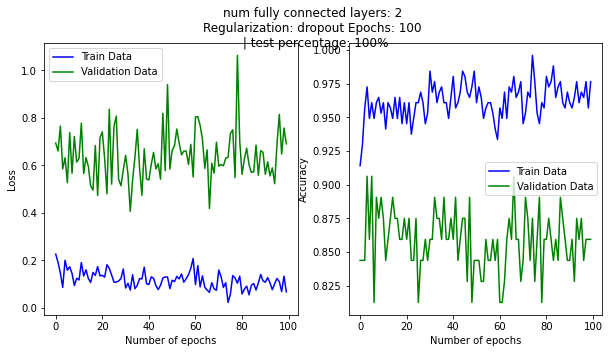

Train on 128 samples, validate on 32 samples
Epoch 1/100
128/128 [==============================] - 3s 22ms/sample - loss: 0.0903 - acc: 0.9609 - val_loss: 0.1488 - val_acc: 0.9375
Epoch 2/100
128/128 [==============================] - 0s 905us/sample - loss: 0.0303 - acc: 0.9922 - val_loss: 0.3890 - val_acc: 0.9375
Epoch 3/100
128/128 [==============================] - 0s 922us/sample - loss: 0.0286 - acc: 0.9922 - val_loss: 0.3768 - val_acc: 0.9375
Epoch 4/100
128/128 [==============================] - 0s 978us/sample - loss: 0.0155 - acc: 1.0000 - val_loss: 0.2379 - val_acc: 0.9062
Epoch 5/100
128/128 [==============================] - 0s 916us/sample - loss: 0.0214 - acc: 0.9844 - val_loss: 0.3312 - val_acc: 0.9375
Epoch 6/100
128/128 [==============================] - 0s 905us/sample - loss: 0.0131 - acc: 1.0000 - val_loss: 0.4856 - val_acc: 0.8750
Epoch 7/100
128/128 [==============================] - 0s 914us/sample - loss: 0.0427 - acc: 0.9844 - val_loss: 0.2231 - val_acc: 0.93

128/128 [==============================] - 0s 806us/sample - loss: 0.0200 - acc: 0.9922 - val_loss: 0.8075 - val_acc: 0.8750
Epoch 61/100
128/128 [==============================] - 0s 840us/sample - loss: 0.0126 - acc: 1.0000 - val_loss: 0.5670 - val_acc: 0.9062
Epoch 62/100
128/128 [==============================] - 0s 803us/sample - loss: 0.0160 - acc: 1.0000 - val_loss: 0.4597 - val_acc: 0.9062
Epoch 63/100
128/128 [==============================] - 0s 819us/sample - loss: 0.0115 - acc: 1.0000 - val_loss: 0.3958 - val_acc: 0.9062
Epoch 64/100
128/128 [==============================] - 0s 848us/sample - loss: 0.0220 - acc: 0.9922 - val_loss: 0.2981 - val_acc: 0.9062
Epoch 65/100
128/128 [==============================] - 0s 859us/sample - loss: 0.0317 - acc: 0.9922 - val_loss: 0.3604 - val_acc: 0.9062
Epoch 66/100
128/128 [==============================] - 0s 858us/sample - loss: 0.0213 - acc: 0.9844 - val_loss: 0.5621 - val_acc: 0.8750
Epoch 67/100
128/128 [=========================

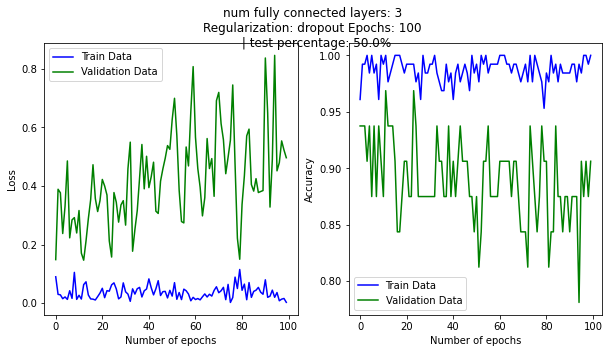

Train on 192 samples, validate on 48 samples
Epoch 1/100
192/192 [==============================] - 3s 16ms/sample - loss: 0.0674 - acc: 0.9792 - val_loss: 0.8510 - val_acc: 0.9167
Epoch 2/100
192/192 [==============================] - 0s 846us/sample - loss: 0.0681 - acc: 0.9792 - val_loss: 1.1436 - val_acc: 0.8958
Epoch 3/100
192/192 [==============================] - 0s 840us/sample - loss: 0.0433 - acc: 0.9792 - val_loss: 0.9977 - val_acc: 0.9167
Epoch 4/100
192/192 [==============================] - 0s 829us/sample - loss: 0.0434 - acc: 0.9896 - val_loss: 0.9190 - val_acc: 0.9167
Epoch 5/100
192/192 [==============================] - 0s 824us/sample - loss: 0.0203 - acc: 0.9948 - val_loss: 1.1541 - val_acc: 0.8958
Epoch 6/100
192/192 [==============================] - 0s 834us/sample - loss: 0.0794 - acc: 0.9635 - val_loss: 1.1392 - val_acc: 0.8750
Epoch 7/100
192/192 [==============================] - 0s 822us/sample - loss: 0.0666 - acc: 0.9792 - val_loss: 1.0986 - val_acc: 0.89

192/192 [==============================] - 0s 996us/sample - loss: 0.0094 - acc: 1.0000 - val_loss: 0.9509 - val_acc: 0.9167
Epoch 61/100
192/192 [==============================] - 0s 967us/sample - loss: 0.0040 - acc: 1.0000 - val_loss: 1.0839 - val_acc: 0.9167
Epoch 62/100
192/192 [==============================] - 0s 976us/sample - loss: 0.0446 - acc: 0.9844 - val_loss: 1.1707 - val_acc: 0.8542
Epoch 63/100
192/192 [==============================] - 0s 980us/sample - loss: 0.0173 - acc: 0.9948 - val_loss: 0.8865 - val_acc: 0.8750
Epoch 64/100
192/192 [==============================] - 0s 1ms/sample - loss: 0.0514 - acc: 0.9896 - val_loss: 0.8471 - val_acc: 0.9375
Epoch 65/100
192/192 [==============================] - 0s 1ms/sample - loss: 0.0109 - acc: 1.0000 - val_loss: 0.8235 - val_acc: 0.9167
Epoch 66/100
192/192 [==============================] - 0s 1ms/sample - loss: 0.0360 - acc: 0.9896 - val_loss: 0.6602 - val_acc: 0.9167
Epoch 67/100
192/192 [==============================]

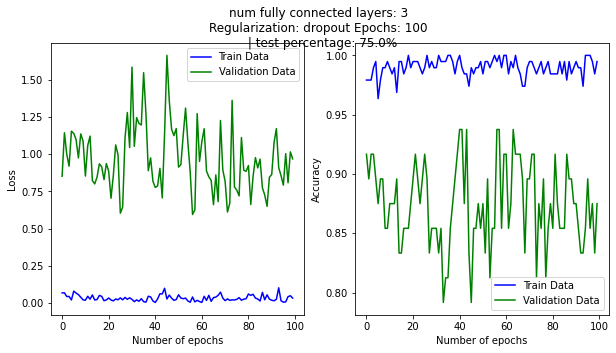

Train on 256 samples, validate on 64 samples
Epoch 1/100
256/256 [==============================] - 3s 11ms/sample - loss: 0.0434 - acc: 0.9922 - val_loss: 0.8040 - val_acc: 0.9219
Epoch 2/100
256/256 [==============================] - 0s 864us/sample - loss: 0.0392 - acc: 0.9883 - val_loss: 0.7633 - val_acc: 0.8906
Epoch 3/100
256/256 [==============================] - 0s 880us/sample - loss: 0.0290 - acc: 0.9922 - val_loss: 1.2466 - val_acc: 0.8281
Epoch 4/100
256/256 [==============================] - 0s 872us/sample - loss: 0.0182 - acc: 0.9961 - val_loss: 1.0132 - val_acc: 0.8281
Epoch 5/100
256/256 [==============================] - 0s 847us/sample - loss: 0.0539 - acc: 0.9805 - val_loss: 0.6542 - val_acc: 0.9375
Epoch 6/100
256/256 [==============================] - 0s 865us/sample - loss: 0.0107 - acc: 0.9961 - val_loss: 0.8495 - val_acc: 0.8906
Epoch 7/100
256/256 [==============================] - 0s 859us/sample - loss: 0.0105 - acc: 0.9961 - val_loss: 0.8745 - val_acc: 0.89

256/256 [==============================] - 0s 1ms/sample - loss: 0.0046 - acc: 1.0000 - val_loss: 1.1513 - val_acc: 0.9219
Epoch 61/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0117 - acc: 0.9961 - val_loss: 1.2390 - val_acc: 0.9062
Epoch 62/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0245 - acc: 0.9922 - val_loss: 1.1435 - val_acc: 0.8750
Epoch 63/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0428 - acc: 0.9883 - val_loss: 0.9340 - val_acc: 0.8750
Epoch 64/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0214 - acc: 0.9922 - val_loss: 1.0450 - val_acc: 0.8750
Epoch 65/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 1.0375 - val_acc: 0.9062
Epoch 66/100
256/256 [==============================] - 0s 1ms/sample - loss: 0.0497 - acc: 0.9883 - val_loss: 1.3163 - val_acc: 0.8750
Epoch 67/100
256/256 [==============================] - 0s 1m

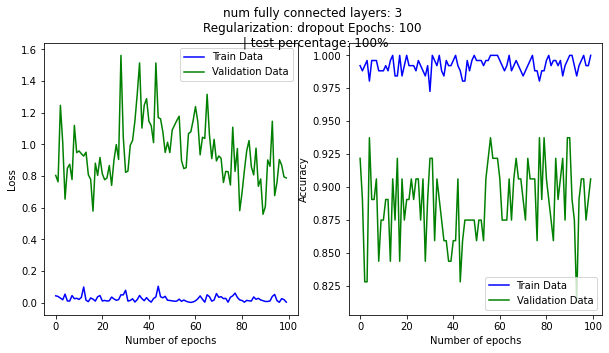

In [316]:
for model_name, model in MODELS.items():
    for train_name, train_set in train_paritions.items():
        X_train_subset, y_train_subset,  X_val_subset, y_val_subset = train_set
        model.train(X_train_subset, y_train_subset,  
                         X_val_subset, y_val_subset, num_epochs=100, batch_size_n=10)
        plot_learning(model, test_amount=train_name)